# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\Repository_ Assesmenet\\First_project_Covid19-\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ali\\Downloads\\from reset\\Other temps\\Code Institute\\Course\\Repository_ Assesmenet\\First_project_Covid19-'

# Section 1

Section 1 content

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("..\\Dataset\\Raw\\covid_19_clean_complete.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\Dataset\\Raw\\covid_19_clean_complete.csv'

Initial Data exploration

---

In [ ]:
df.shape

(49068, 10)

In [ ]:
df = df.sample(n=10000, random_state=1)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
44580,NaN,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean
16964,NaN,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa
27026,NaN,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe
11749,NaN,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 44580 to 33352
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  3075 non-null   object 
 1   Country/Region  10000 non-null  object 
 2   Lat             10000 non-null  float64
 3   Long            10000 non-null  float64
 4   Date            10000 non-null  object 
 5   Confirmed       10000 non-null  int64  
 6   Deaths          10000 non-null  int64  
 7   Recovered       10000 non-null  int64  
 8   Active          10000 non-null  int64  
 9   WHO Region      10000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 859.4+ KB


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04
mean,21.796589,23.806097,1.542218e+04,782.156700,7.364596e+03,7.275426e+03
std,24.730143,70.331946,1.229299e+05,5965.432539,5.275618e+04,7.390806e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.946500,-15.310100,3.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.700000,21.824300,1.540000e+02,2.000000,2.700000e+01,2.400000e+01
75%,41.204380,84.250000,1.430000e+03,27.000000,6.330000e+02,5.602500e+02
max,71.706900,178.065000,4.038816e+06,144430.000000,1.620313e+06,2.661117e+06


In [ ]:
df.isnull().sum()

Province/State    6925
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
Active               0
WHO Region           0
dtype: int64

In [ ]:
df['Province/State'].unique()

array([nan, 'Greenland', 'Jilin', 'Tianjin', 'Channel Islands',
       'Faroe Islands', 'Sint Maarten', 'Shaanxi',
       'Saint Pierre and Miquelon', 'Guadeloupe', 'Ontario', 'Shanxi',
       'Alberta', 'Nova Scotia', 'Heilongjiang', 'Hebei',
       'Inner Mongolia', 'Guizhou', 'Reunion', 'Ningxia', 'Victoria',
       'Zhejiang', 'Martinique', 'Shanghai', 'Mayotte', 'Queensland',
       'British Columbia', 'Saskatchewan', 'Newfoundland and Labrador',
       'Sichuan', 'Quebec', 'Anguilla', 'Tibet', 'Liaoning',
       'Cayman Islands', 'Western Australia', 'Curacao', 'New Caledonia',
       'Turks and Caicos Islands', 'Jiangxi', 'St Martin',
       'South Australia', 'Australian Capital Territory', 'Gibraltar',
       'Hainan', 'Aruba', 'New South Wales', 'Chongqing',
       'Prince Edward Island', 'Isle of Man', 'Northern Territory',
       'Montserrat', 'Beijing', 'Jiangsu', 'Qinghai', 'Yukon',
       'French Polynesia', 'Henan', 'Shandong', 'Northwest Territories',
       'Falkland 

In [ ]:
df['Province/State'].value_counts()

Province/State
Shanxi                  49
British Columbia        49
Prince Edward Island    49
Inner Mongolia          48
Tibet                   48
                        ..
Bermuda                 32
Saskatchewan            31
Victoria                31
Yunnan                  29
Gansu                   27
Name: count, Length: 78, dtype: int64

In [ ]:
df.query("`Province/State`.isna()").value_counts()

Series([], Name: count, dtype: int64)

states which are not available(NaN) under Province/State in dataset marking them with unknown

In [ ]:
df['Province/State'].fillna('Unknown', inplace=True)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe
11749,Unknown,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe


Creating a new column Total

In [ ]:
df['Total'] = df['Confirmed'] + df['Deaths'] +df['Recovered'] + df['Active']
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Total
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660


In [ ]:
df.loc[[27026],['Confirmed','Recovered','Deaths']]

,Confirmed,Recovered,Deaths
27026,830,575,10


In [ ]:
df.iloc[10:15, 1:7]

,Country/Region,Lat,Long,Date,Confirmed,Deaths
29411,Peru,-9.190000,-75.01520,2020-05-13,76306,2169
37707,Guyana,4.860416,-58.93018,2020-06-14,159,12
38743,Gabon,-0.803700,11.60940,2020-06-18,4340,32
43157,Denmark,56.263900,9.50180,2020-07-05,12832,606
38443,China,39.305400,117.32300,2020-06-17,197,3


In [ ]:
df['WHO Region'].nunique()

6

Rename a column from Deaths to no_of_deaths

In [ ]:
df.rename(columns={'Deaths': 'no_of_deaths'}, inplace= True)
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660


In [ ]:
df.select_dtypes(include ='number')

,Lat,Long,Confirmed,no_of_deaths,Recovered,Active,Total
44580,33.886917,9.537499,1240,50,1067,123,2480
16964,-29.610000,28.233600,0,0,0,0,0
27026,41.204380,74.766098,830,10,575,245,1660
11749,-11.202700,17.873900,0,0,0,0,0
40807,71.706900,-42.604300,13,0,13,0,26
...,...,...,...,...,...,...,...
28383,48.669000,19.699000,1455,26,919,510,2910
16503,22.300000,114.200000,410,4,102,304,820
10662,-32.522800,-55.765800,0,0,0,0,0
9932,-37.813600,144.963100,7,0,4,3,14


In [ ]:
df.select_dtypes(include='object')

,Province/State,Country/Region,Date,WHO Region
44580,Unknown,Tunisia,2020-07-10,Eastern Mediterranean
16964,Unknown,Lesotho,2020-03-26,Africa
27026,Unknown,Kyrgyzstan,2020-05-04,Europe
11749,Unknown,Angola,2020-03-07,Africa
40807,Greenland,Greenland,2020-06-26,Europe
...,...,...,...,...
28383,Unknown,Slovakia,2020-05-09,Europe
16503,Hong Kong,China,2020-03-25,Western Pacific
10662,Unknown,Uruguay,2020-03-02,Americas
9932,Victoria,Australia,2020-02-29,Western Pacific


Changing the date to datetime

In [ ]:
df = df.astype({'Date':'datetime64[ns]'})

Checking for duplicates in Country/Region column

In [ ]:
df[df.duplicated(subset=['Country/Region'], keep=False)]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660
11749,Unknown,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa,0
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe,26
...,...,...,...,...,...,...,...,...,...,...,...
28383,Unknown,Slovakia,48.669000,19.699000,2020-05-09,1455,26,919,510,Europe,2910
16503,Hong Kong,China,22.300000,114.200000,2020-03-25,410,4,102,304,Western Pacific,820
10662,Unknown,Uruguay,-32.522800,-55.765800,2020-03-02,0,0,0,0,Americas,0
9932,Victoria,Australia,-37.813600,144.963100,2020-02-29,7,0,4,3,Western Pacific,14


Extracting day and Month from Date Column

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday


In [ ]:
df['Day'].value_counts()

Day
Sunday       1486
Monday       1453
Friday       1451
Wednesday    1444
Saturday     1443
Thursday     1368
Tuesday      1355
Name: count, dtype: int64

Calculating Moving Average of Confirmed cases, creating a new columns 4days_avg

In [ ]:
df['4days_avg'] = df['Confirmed'].rolling(window=4).mean()
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN
11749,Unknown,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa,0,3,Saturday,517.50
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe,26,6,Friday,210.75
31771,Unknown,Saudi Arabia,23.885942,45.079162,2020-05-22,67719,364,39003,28352,Eastern Mediterranean,135438,5,Friday,17140.50
27867,Unknown,Sudan,12.862800,30.217600,2020-05-07,930,52,92,786,Eastern Mediterranean,1860,5,Thursday,17165.50
30498,Unknown,Uruguay,-32.522800,-55.765800,2020-05-17,734,20,564,150,Americas,1468,5,Sunday,17349.00
391,Unknown,Indonesia,-0.789300,113.921300,2020-01-23,0,0,0,0,South-East Asia,0,1,Thursday,17345.75
39477,Jilin,China,43.666100,126.192300,2020-06-21,155,2,153,0,Western Pacific,310,6,Sunday,454.75


Checking cofirmed cases' difference on daily basis, creating a new column

In [ ]:
df['Difference'] = df['Confirmed'].diff(periods=1)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0
11749,Unknown,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa,0,3,Saturday,517.50,-830.0
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe,26,6,Friday,210.75,13.0


Using an apply function to get differnce of Recovered cases and no_of_deaths cases

In [ ]:
def deaths_and_recovered_diff(df):
    
    return df['Recovered'] - df['no_of_deaths']

df['diff_death_and_recovered'] = df.apply(deaths_and_recovered_diff, axis=1)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565
11749,Unknown,Angola,-11.202700,17.873900,2020-03-07,0,0,0,0,Africa,0,3,Saturday,517.50,-830.0,0
40807,Greenland,Greenland,71.706900,-42.604300,2020-06-26,13,0,13,0,Europe,26,6,Friday,210.75,13.0,13


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'no_of_deaths', 'Recovered', 'Active', 'WHO Region', 'Total', 'Month',
       'Day', '4days_avg', 'Difference', 'diff_death_and_recovered'],
      dtype='object')

Checking maximum value in cinfirmed cases

In [ ]:
df['Confirmed'].max()

4038816

Creating a dataframe with maximum value in confirmed cases

In [ ]:
max_value = df['Confirmed'].max()
df_max = df.query('Confirmed == @max_value')
df_max.value_counts()

Province/State  Country/Region  Lat   Long    Date        Confirmed  no_of_deaths  Recovered  Active   WHO Region  Total    Month  Day       4days_avg   Difference  diff_death_and_recovered
Unknown         US              40.0  -100.0  2020-07-23  4038816    144430        1233269    2661117  Americas    8077632  7      Thursday  1071162.75  4038104.0   1088839                     1
Name: count, dtype: int64

Sorting a data frame according to maximum number of confirmed cases

In [ ]:
df.sort_values(by=['Confirmed'], ascending=False)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
47986,Unknown,US,40.00000,-100.000000,2020-07-23,4038816,144430,1233269,2661117,Americas,8077632,7,Thursday,1071162.75,4038104.0,1088839
47725,Unknown,US,40.00000,-100.000000,2020-07-22,3970121,143316,1210849,2615956,Americas,7940242,7,Wednesday,992792.50,3970084.0,1067533
47203,Unknown,US,40.00000,-100.000000,2020-07-20,3834677,141025,1160087,2533565,Americas,7669354,7,Monday,962344.00,3834479.0,1019062
44332,Unknown,US,40.00000,-100.000000,2020-07-09,3117946,133290,969111,2015545,Americas,6235892,7,Thursday,782717.50,3117746.0,835821
41983,Unknown,US,40.00000,-100.000000,2020-06-30,2636414,127432,720631,1788351,Americas,5272828,6,Tuesday,670789.75,2635847.0,593199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14498,Unknown,Kyrgyzstan,41.20438,74.766098,2020-03-17,0,0,0,0,Europe,0,3,Tuesday,27161.00,-3.0,0
2081,Unknown,South Sudan,6.87700,31.307000,2020-01-29,0,0,0,0,Africa,0,1,Wednesday,614.75,-344.0,0
14867,Unknown,Malawi,-13.25430,34.301500,2020-03-18,0,0,0,0,Africa,0,3,Wednesday,638.00,-1181.0,0
7350,Prince Edward Island,Canada,46.51070,-63.416800,2020-02-19,0,0,0,0,Americas,0,2,Wednesday,637.75,0.0,0


In [ ]:
df.sort_values(by=['Date'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
207,Unknown,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia,4,1,Wednesday,157.75,-145.0,0
108,Mayotte,France,-12.827500,45.166244,2020-01-22,0,0,0,0,Europe,0,1,Wednesday,13997.50,-48096.0,0
159,Unknown,Mongolia,46.862500,103.846700,2020-01-22,0,0,0,0,Western Pacific,0,1,Wednesday,867.00,-358.0,0
85,Unknown,Cote d'Ivoire,7.540000,-5.547100,2020-01-22,0,0,0,0,Africa,0,1,Wednesday,3803.50,-14150.0,0
113,Martinique,France,14.641500,-61.024200,2020-01-22,0,0,0,0,Europe,0,1,Wednesday,6972.50,-27890.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48851,Saskatchewan,Canada,52.939900,-106.450900,2020-07-27,1209,16,0,1193,Americas,2418,7,Monday,746.00,1098.0,-16
49050,Unknown,Kosovo,42.602636,20.902977,2020-07-27,7413,185,4027,3201,Europe,14826,7,Monday,2129.50,7329.0,3842
48987,Unknown,Philippines,12.879721,121.774017,2020-07-27,82040,1945,26446,53649,Western Pacific,164080,7,Monday,20748.00,82029.0,24501
48947,Unknown,Kenya,-0.023600,37.906200,2020-07-27,17975,285,7833,9857,Africa,35950,7,Monday,162884.75,17975.0,7548


Using groupby to check total confirmed cases, and avg deaths per country

In [ ]:
(df.groupby(by=['Country/Region','Confirmed'])
.agg(Total_confirmed = ('Confirmed', 'sum'),
     Total_deaths = ('no_of_deaths', 'sum'),
     Avg_confirmed = ('Confirmed', 'mean'),
     Avg_deaths = ('no_of_deaths', 'mean'))
.reset_index()
)

,Country/Region,Confirmed,Total_confirmed,Total_deaths,Avg_confirmed,Avg_deaths
0,Afghanistan,0,0,0,0.0,0.0
1,Afghanistan,1,4,0,1.0,0.0
2,Afghanistan,4,4,0,4.0,0.0
3,Afghanistan,5,5,0,5.0,0.0
4,Afghanistan,22,22,0,22.0,0.0
...,...,...,...,...,...,...
5740,Zimbabwe,1478,1478,25,1478.0,25.0
5741,Zimbabwe,1611,1611,25,1611.0,25.0
5742,Zimbabwe,1820,1820,26,1820.0,26.0
5743,Zimbabwe,2034,2034,26,2034.0,26.0


Using a function for forcast in groupby agg function

In [ ]:
def forcast_nextday(x):
    #print(type(x), x.head())
    return x.sum()*2

df.groupby(by=['Confirmed']).agg(Forcast_Next_day=('Confirmed', forcast_nextday))

,Forcast_Next_day
Confirmed,
0,0
1,482
2,352
3,726
4,544
...,...
2636414,5272828
3117946,6235892
3834677,7669354


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 44580 to 33352
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Province/State            10000 non-null  object        
 1   Country/Region            10000 non-null  object        
 2   Lat                       10000 non-null  float64       
 3   Long                      10000 non-null  float64       
 4   Date                      10000 non-null  datetime64[ns]
 5   Confirmed                 10000 non-null  int64         
 6   no_of_deaths              10000 non-null  int64         
 7   Recovered                 10000 non-null  int64         
 8   Active                    10000 non-null  int64         
 9   WHO Region                10000 non-null  object        
 10  Total                     10000 non-null  int64         
 11  Month                     10000 non-null  int32         
 12  Day                

In [ ]:
df_new = df.filter(['Confirmed', 'no_of_deaths'])
df_new.head(3)

,Confirmed,no_of_deaths
44580,1240,50
16964,0,0
27026,830,10


In [ ]:
print(df[col].describe())

count    1.000000e+04
mean     7.275426e+03
std      7.390806e+04
min     -1.400000e+01
25%      0.000000e+00
50%      2.400000e+01
75%      5.602500e+02
max      2.661117e+06
Name: Active, dtype: float64


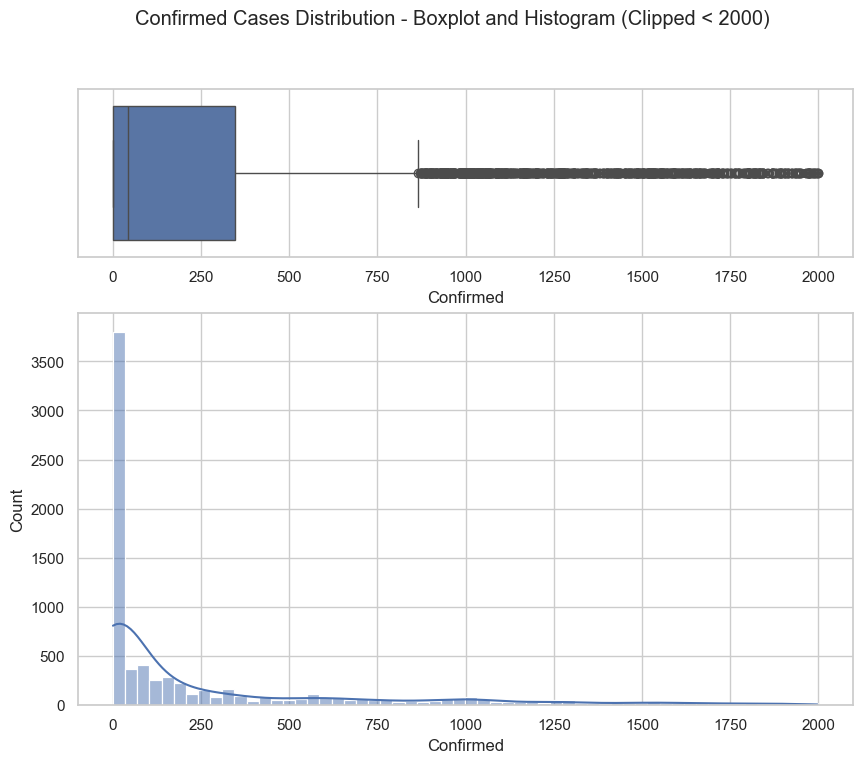

This is the range where a data point is not an outlier for 'Confirmed': from -2137.5 to 3570.5




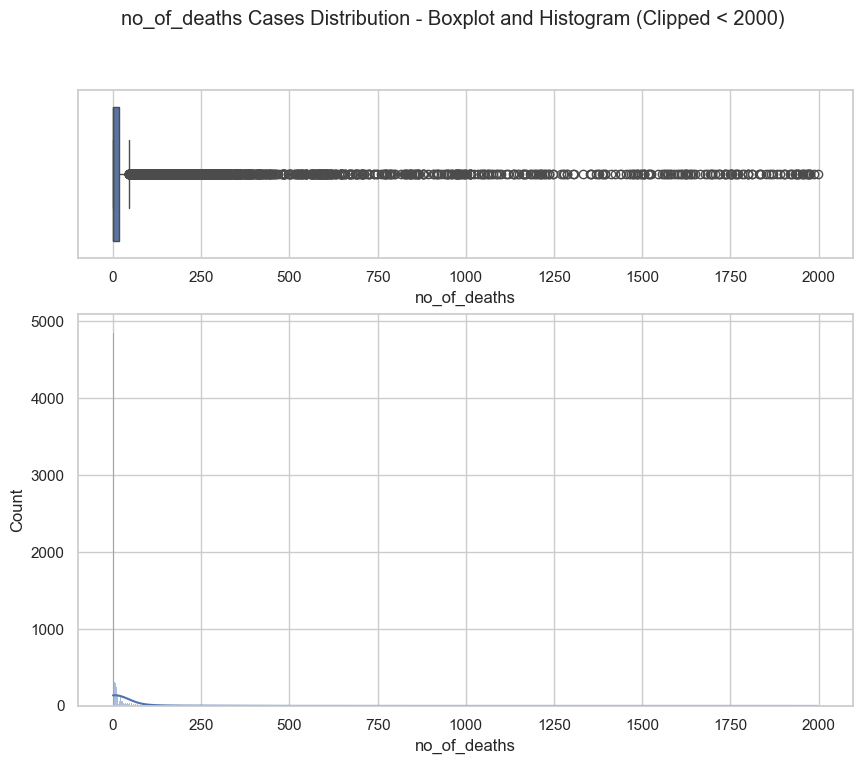

This is the range where a data point is not an outlier for 'no_of_deaths': from -40.5 to 67.5




In [ ]:
def plot_histogram_and_boxplot(df):
    for col in df.columns:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8),
                                 gridspec_kw={"height_ratios": (0.3, 0.7)})
        # Clip extreme values for visualization (optional)
        clip_threshold = 2000
        clipped_df = df[df[col] < clip_threshold]
        sns.boxplot(data=clipped_df, x=col, ax=axes[0])
        sns.histplot(data=clipped_df, x=col, kde=True, ax=axes[1], log_scale=False)
        # Optional: format large y-axis values
        # axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
        fig.suptitle(f"{col} Cases Distribution - Boxplot and Histogram (Clipped < {clip_threshold})")
        plt.show()
        # IQR and outlier range
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        print(
            f"This is the range where a data point is not an outlier for '{col}': from "
            f"{(df[col].quantile(0.25) - 1.5 * IQR).round(2)} to "
            f"{(df[col].quantile(0.75) + 1.5 * IQR).round(2)}"
        )
        print("\n")
        
plot_histogram_and_boxplot(df_new)        

Checking the distribution of Confirmed Cases and no of deaths before applying Feature Engnineering

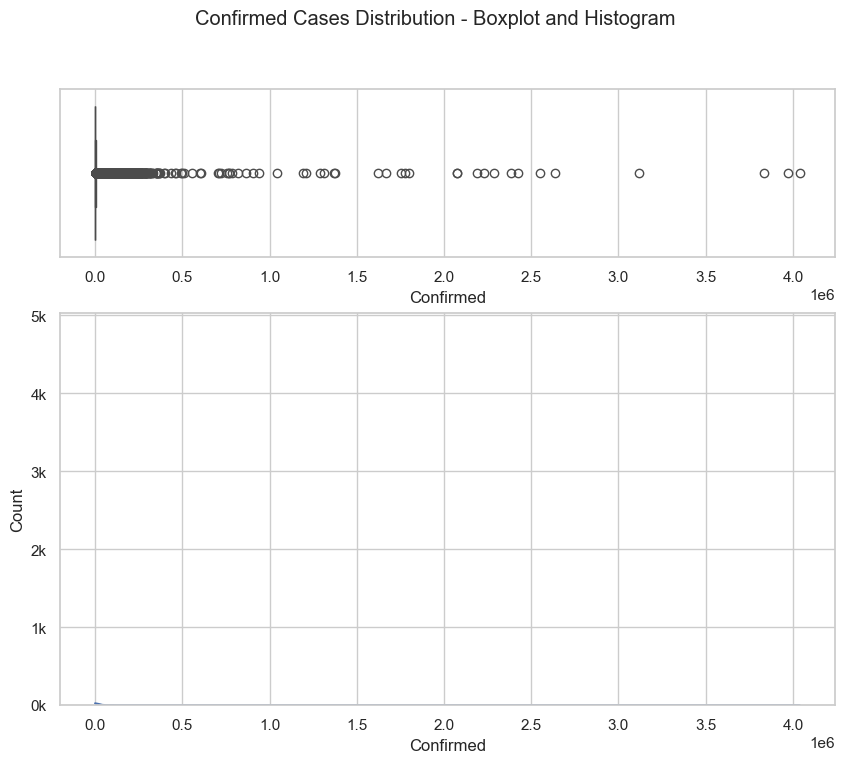

This is the range where a data point is not an outlier: from -2137.5 to 3570.5




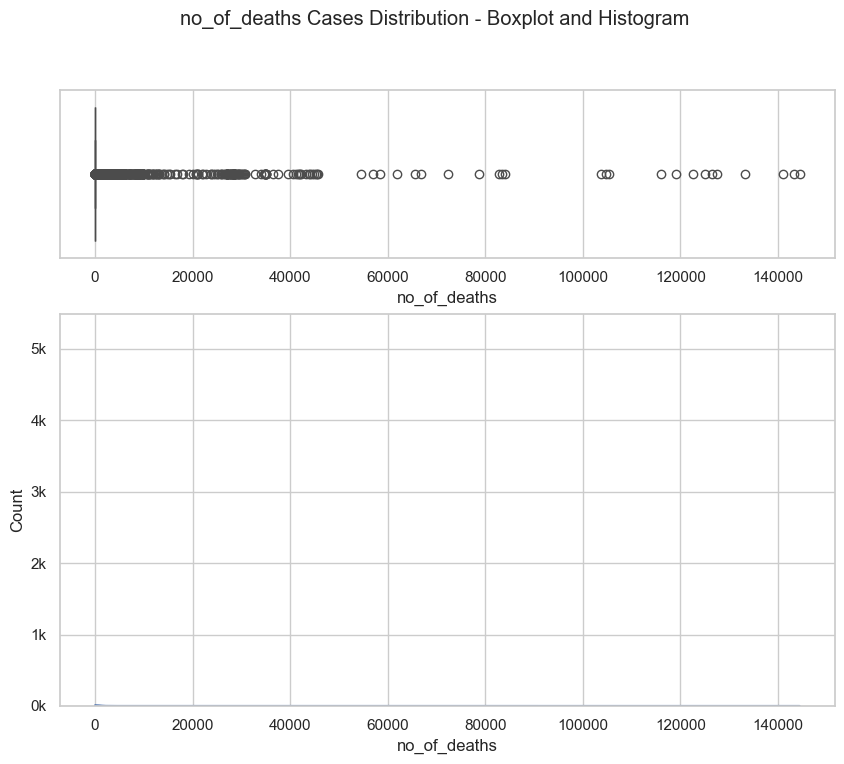

This is the range where a data point is not an outlier: from -40.5 to 67.5




In [ ]:
from matplotlib.ticker import FuncFormatter


def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(10,8), gridspec_kw={"height_ratios": (0.3,0.7)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    #axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
    fig.suptitle(f"{col} Cases Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a data point is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

plot_histogram_and_boxplot(df_new)

Importing Feature Engineering Packages

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

Pipleine for OrdinaLEncoder and checking for correlated features

In [ ]:
from feature_engine.encoding import OrdinalEncoder
pipeline = Pipeline([
      ('ordinal_encoder', OrdinalEncoder(encoding_method='arbitrary') ),
      ( 'SmartCorrelatedSelection', SmartCorrelatedSelection(method="pearson",
                                                             threshold=0.6,
                                                             selection_method="variance",))
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

c:\Users\Ali\Downloads\from reset\Other temps\Code Institute\Course\Repository_ Assesmenet\First_project_Covid19-\venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
c:\Users\Ali\Downloads\from reset\Other temps\Code Institute\Course\Repository_ Assesmenet\First_project_Covid19-\venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[feature]):
c:\Users\Ali\Downloads\from reset\Other temps\Code Institute\Course\Repository_ Assesmenet\First_project_Covid19-\venv\Lib\site-packages\feature_engine\encoding\base_encoder.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in

,Province/State,Country/Region,Lat,Long,Date,WHO Region,Total,Month,Day,4days_avg
44580,0,0,33.886917,9.537499,2020-07-10,0,2480,7,0,NaN
16964,0,1,-29.610000,28.233600,2020-03-26,1,0,3,1,NaN
27026,0,2,41.204380,74.766098,2020-05-04,2,1660,5,2,NaN
11749,0,3,-11.202700,17.873900,2020-03-07,1,0,3,3,517.50
40807,1,4,71.706900,-42.604300,2020-06-26,2,26,6,0,210.75


checking for correlated features

In [ ]:
pipeline['SmartCorrelatedSelection'].correlated_feature_sets_

[{'Active',
  'Confirmed',
  'Difference',
  'Recovered',
  'Total',
  'diff_death_and_recovered',
  'no_of_deaths'}]

In [ ]:
pipeline['SmartCorrelatedSelection'].features_to_drop_

['Confirmed',
 'no_of_deaths',
 'Recovered',
 'Active',
 'Difference',
 'diff_death_and_recovered']

In [ ]:
df_transformed.head()

,Province/State,Country/Region,Lat,Long,Date,WHO Region,Total,Month,Day,4days_avg
44580,0,0,33.886917,9.537499,2020-07-10,0,2480,7,0,NaN
16964,0,1,-29.610000,28.233600,2020-03-26,1,0,3,1,NaN
27026,0,2,41.204380,74.766098,2020-05-04,2,1660,5,2,NaN
11749,0,3,-11.202700,17.873900,2020-03-07,1,0,3,3,517.50
40807,1,4,71.706900,-42.604300,2020-06-26,2,26,6,0,210.75


In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565


In [ ]:
df.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
Date                        0
Confirmed                   0
no_of_deaths                0
Recovered                   0
Active                      0
WHO Region                  0
Total                       0
Month                       0
Day                         0
4days_avg                   3
Difference                  1
diff_death_and_recovered    0
dtype: int64

creating a pipeline with transformers Imputers  to fill missing values and 

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import DropMissingData

pipeline = Pipeline([
      ( 'DropFeatures', DropFeatures(features_to_drop=['Day']) ),    # Drop the 'Day' column for project purpose
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='mean', variables=['4days_avg','Difference']) ),
      ( 'DropMissingData', DropMissingData()),
])

df_transforming = pipeline.fit_transform(df)

Checking the missing data again

In [ ]:
df_transforming.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
Date                        0
Confirmed                   0
no_of_deaths                0
Recovered                   0
Active                      0
WHO Region                  0
Total                       0
Month                       0
4days_avg                   0
Difference                  0
diff_death_and_recovered    0
dtype: int64

Categorical variables to encode using Ordinal Encoder

In [ ]:
variables_engineering= ['Province/State','Country/Region','WHO Region']
variables_engineering

['Province/State', 'Country/Region', 'WHO Region']

In [ ]:
df_engineering = df[variables_engineering].copy()
df_engineering.head(3)

,Province/State,Country/Region,WHO Region
44580,Unknown,Tunisia,Eastern Mediterranean
16964,Unknown,Lesotho,Africa
27026,Unknown,Kyrgyzstan,Europe


writing a function for Feature Engineering Analysis, checking the distributions

In [ ]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')



def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop over each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng, list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing values in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(20, 5))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show();
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.show();


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

Assessing the variables using the function above with Ordinal Encoder

* Variable Analyzed: Province/State
* Applied transformation: ['Province/State_ordinal_encoder'] 



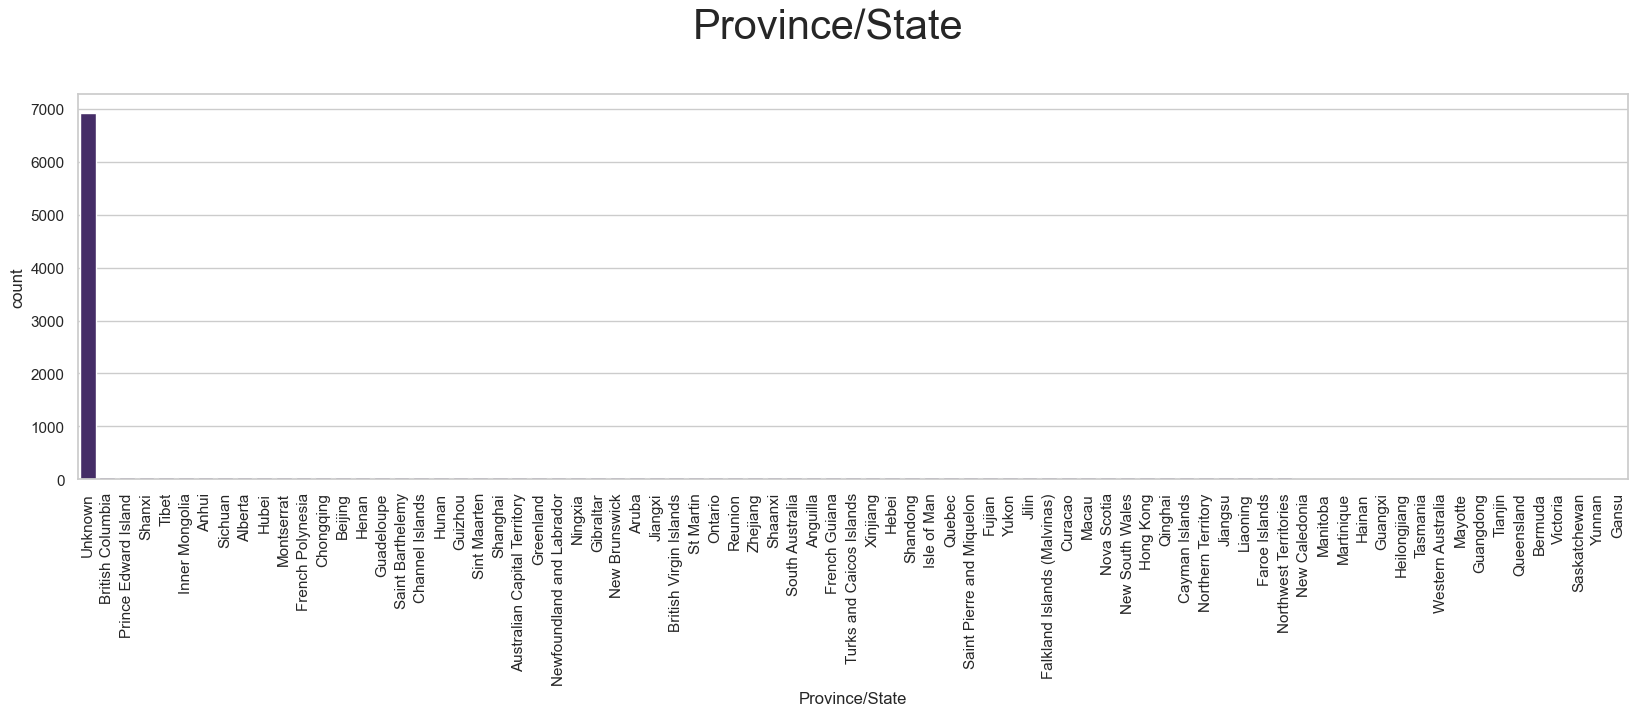

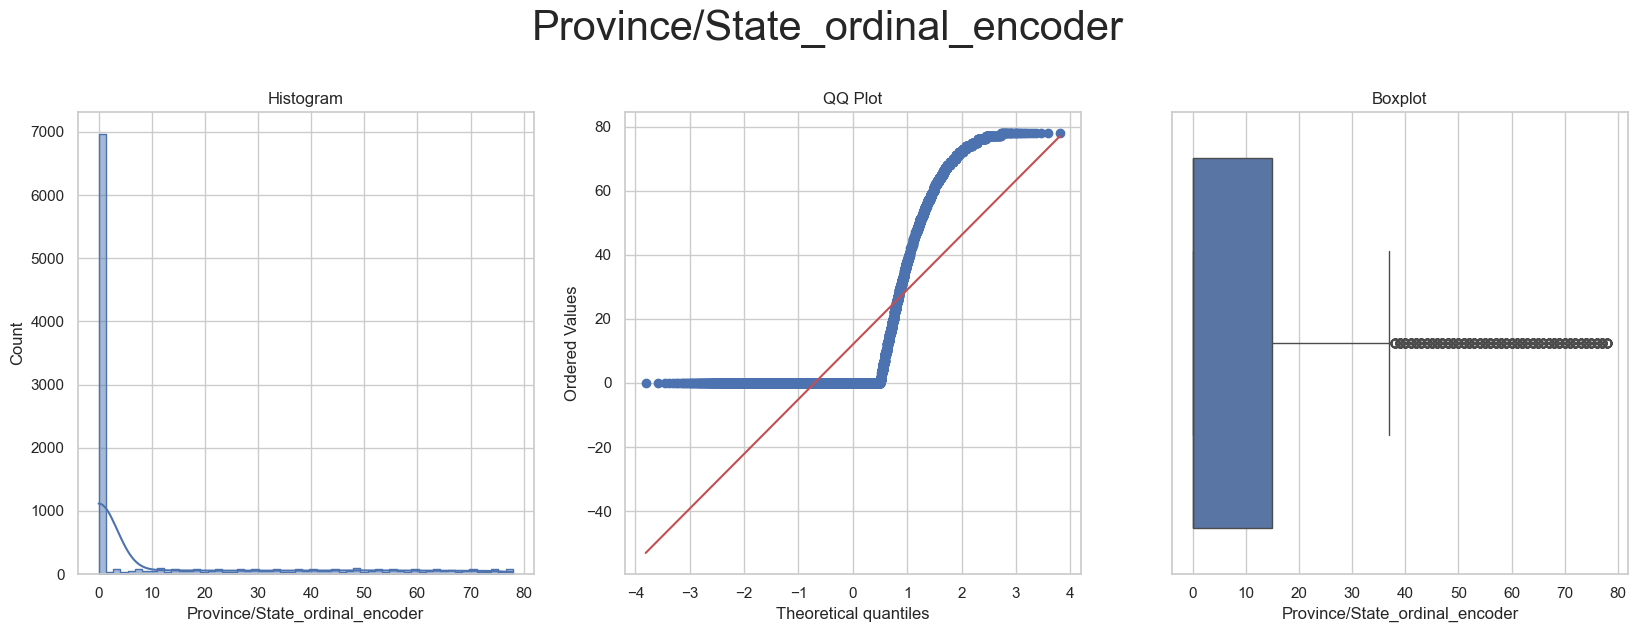



* Variable Analyzed: Country/Region
* Applied transformation: ['Country/Region_ordinal_encoder'] 



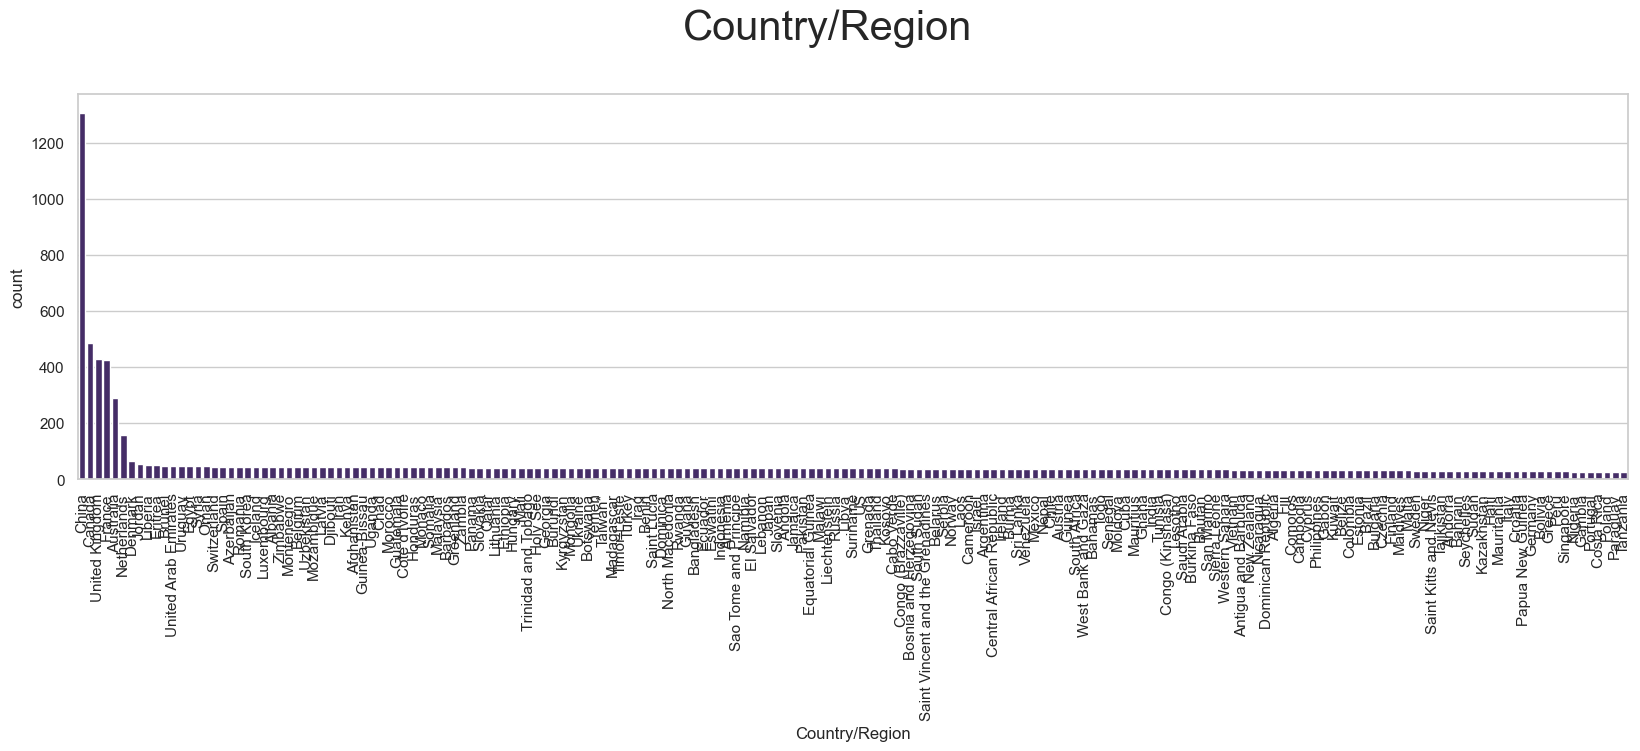

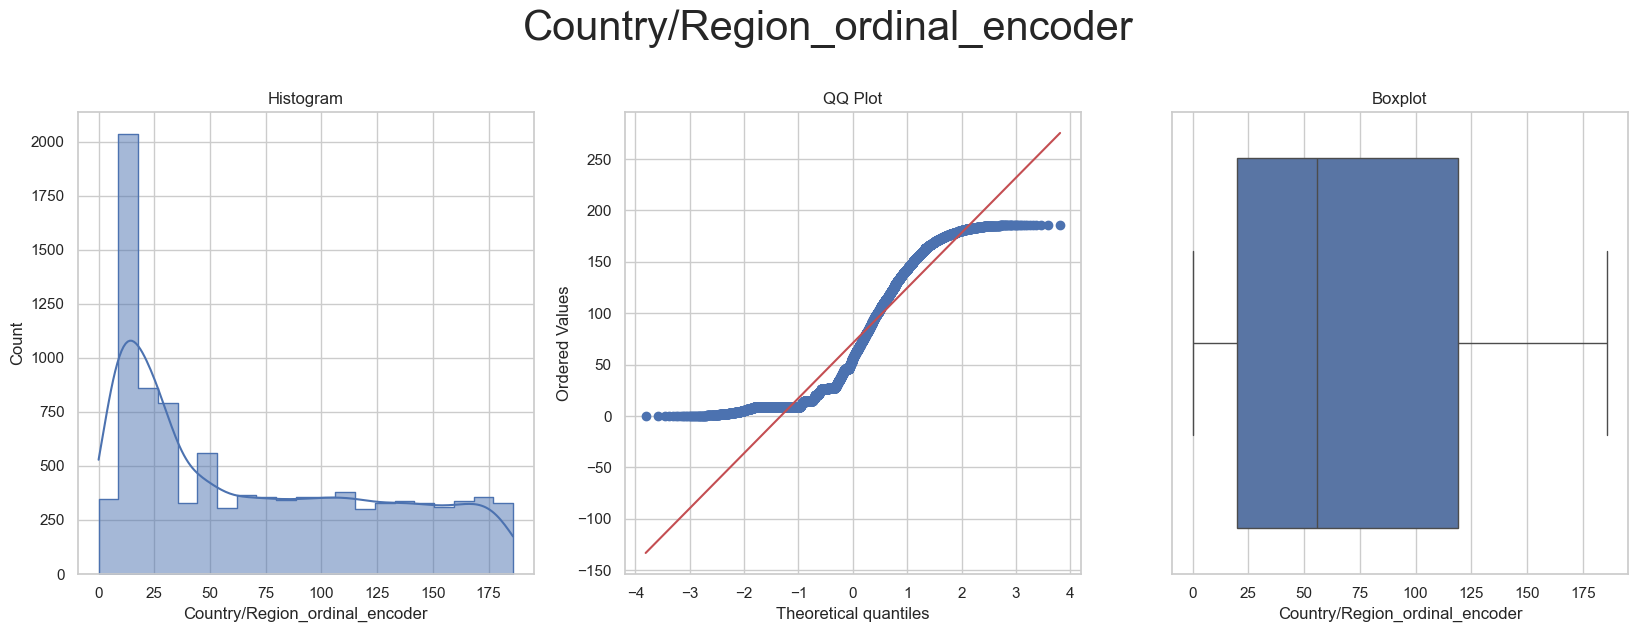



* Variable Analyzed: WHO Region
* Applied transformation: ['WHO Region_ordinal_encoder'] 



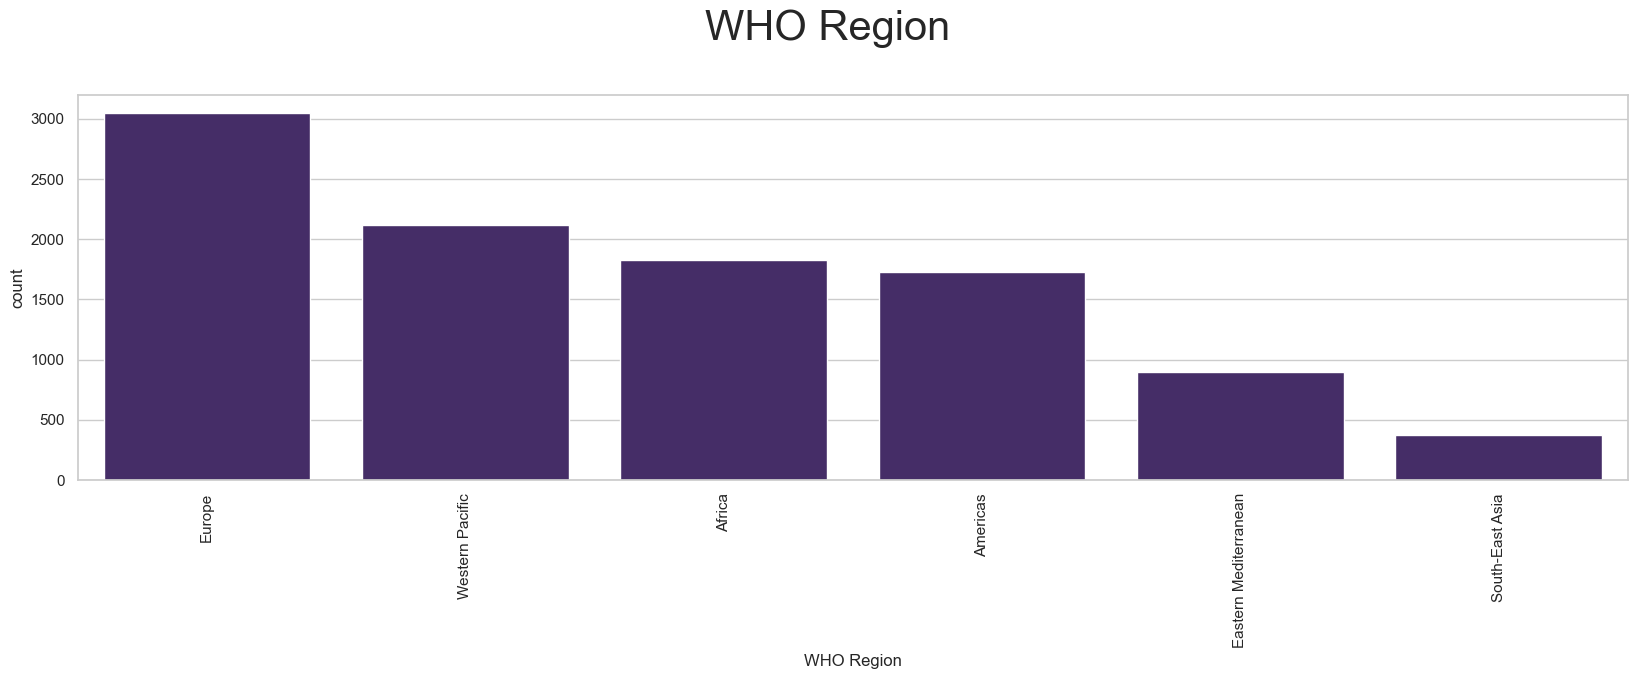

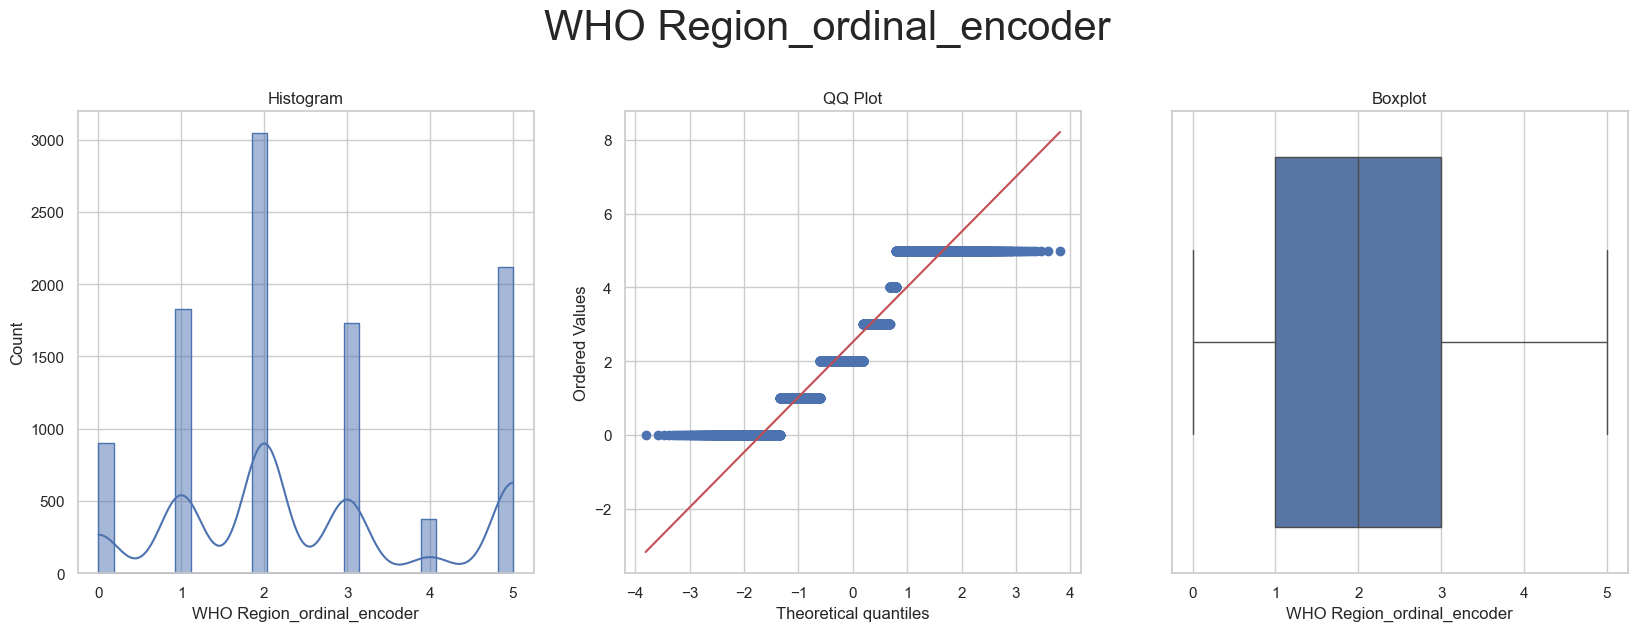

In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering,analysis_type='ordinal_encoder')

For outliers in Confirmed Column

In [ ]:
df_engineering = df[['Confirmed']].copy()
df_engineering =df_engineering.rename(columns={'Confirmed':'Confirmed_cases'})
df_engineering.head(3)

,Confirmed_cases
44580,1240
16964,0
27026,830


Applying the above function to use winsorizer for outliers

* Variable Analyzed: Confirmed_cases
* Applied transformation: ['Confirmed_cases_iqr'] 



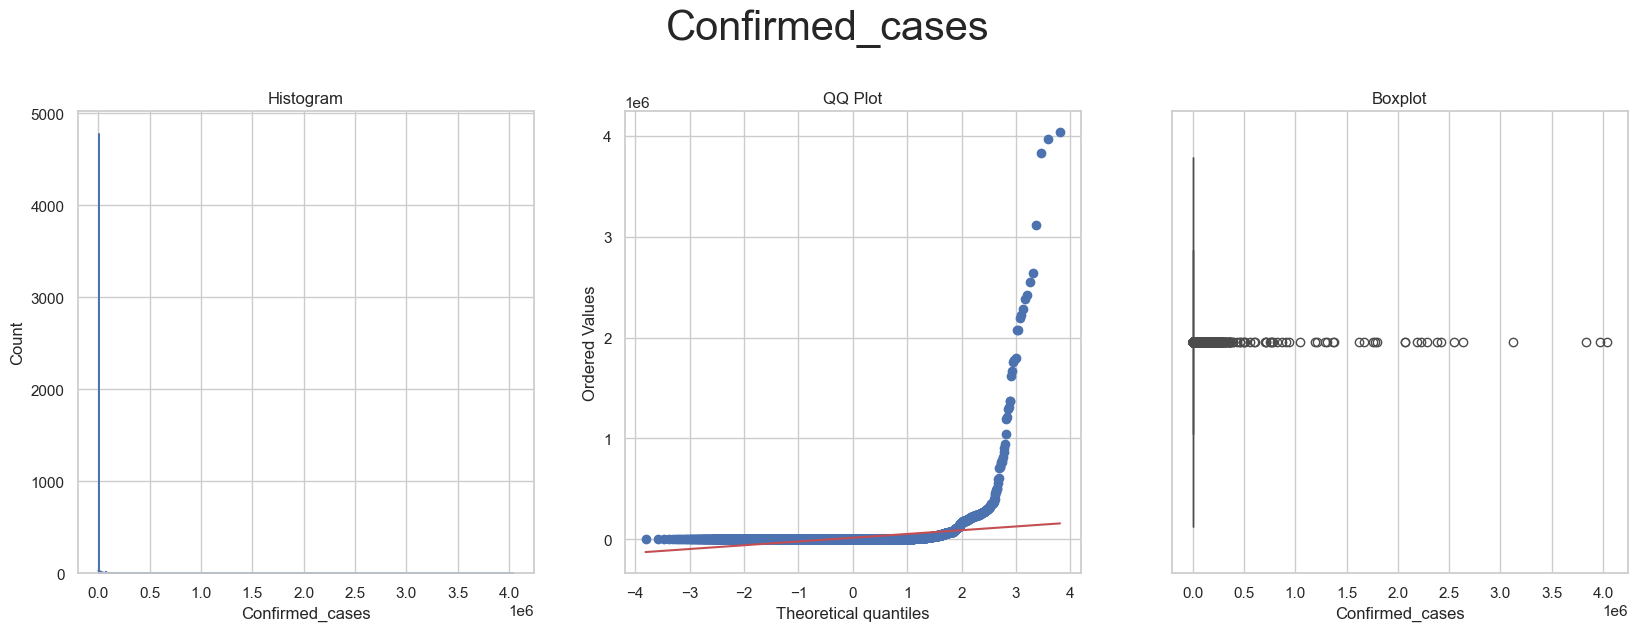

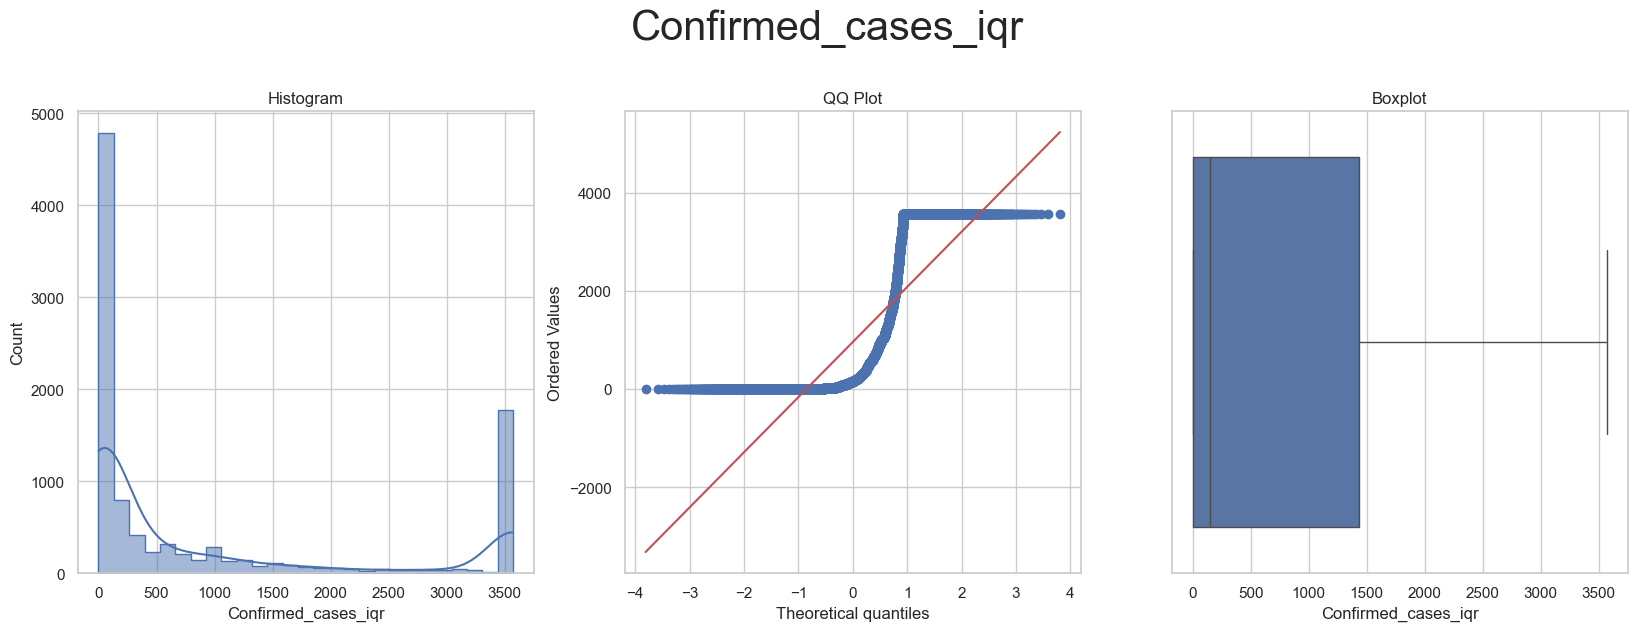

In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering.dropna(),
                                            analysis_type='outlier_winsorizer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 44580 to 33352
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Province/State            10000 non-null  object        
 1   Country/Region            10000 non-null  object        
 2   Lat                       10000 non-null  float64       
 3   Long                      10000 non-null  float64       
 4   Date                      10000 non-null  datetime64[ns]
 5   Confirmed                 10000 non-null  int64         
 6   no_of_deaths              10000 non-null  int64         
 7   Recovered                 10000 non-null  int64         
 8   Active                    10000 non-null  int64         
 9   WHO Region                10000 non-null  object        
 10  Total                     10000 non-null  int64         
 11  Month                     10000 non-null  int32         
 12  Day                

Numerical transformation, leaving the Lat and Long variables out on purpose.

In [ ]:
df_engineering = df[['4days_avg','Difference']].copy()
df_engineering.head(3)

,4days_avg,Difference
44580,NaN,NaN
16964,NaN,-1240.0
27026,NaN,830.0


In [ ]:
df_engineering.isnull().sum()

4days_avg     3
Difference    1
dtype: int64

Pipeline to fill missing data before applying FeatureEnginneringAnalysis function

In [ ]:
pipeline = Pipeline([
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='mean', variables=['4days_avg','Difference']) ),
      ( 'DropMissingData', DropMissingData()),
])

df_engineering = pipeline.fit_transform(df_engineering)
df_engineering.isnull().sum()

4days_avg     0
Difference    0
dtype: int64

Applying the function for numerical

* Variable Analyzed: 4days_avg
* Applied transformation: ['4days_avg_power', '4days_avg_yeo_johnson'] 



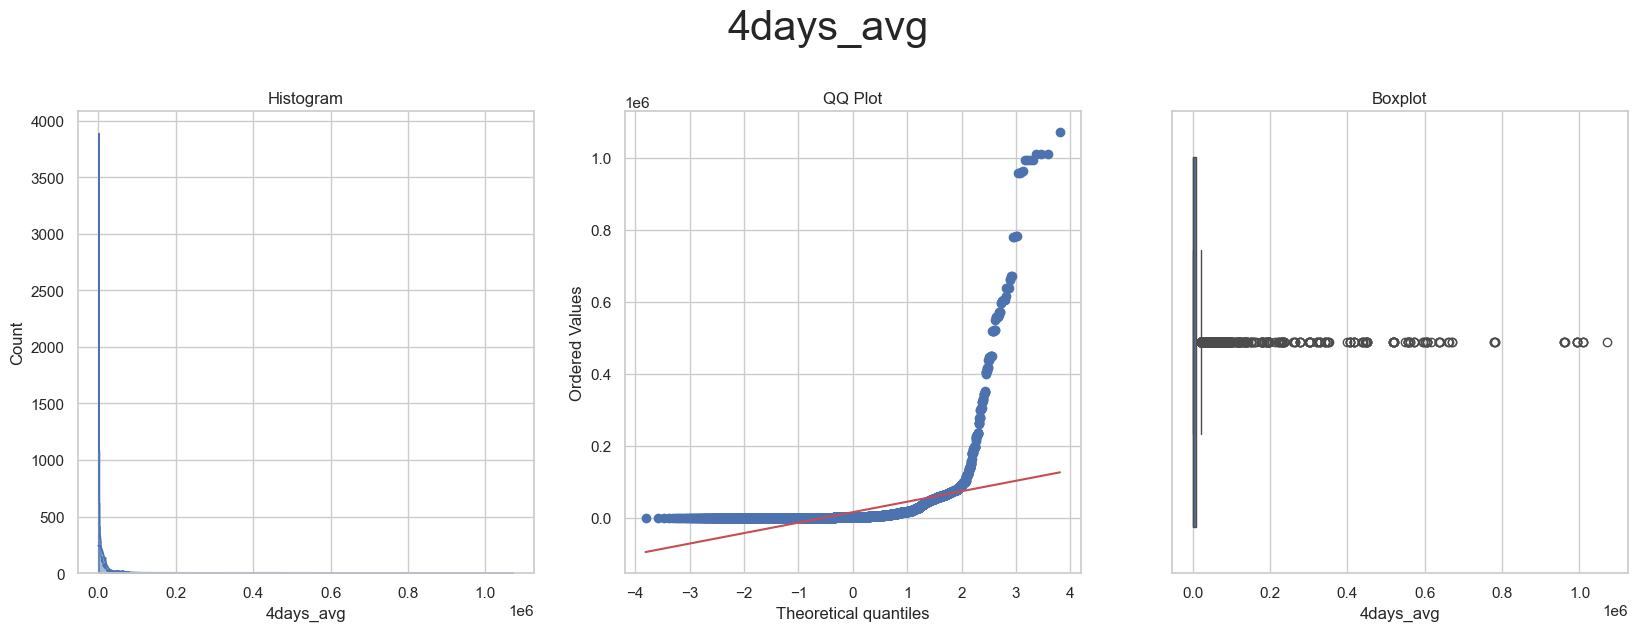

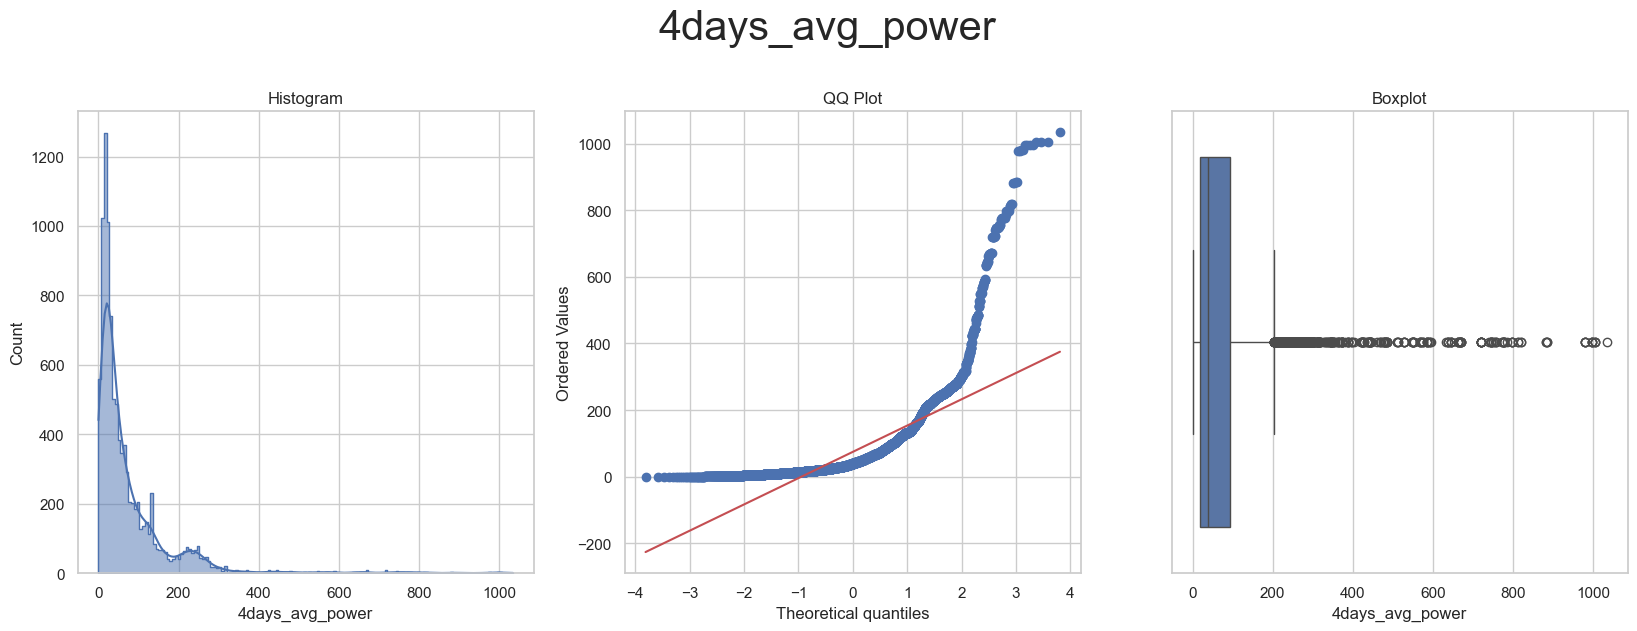

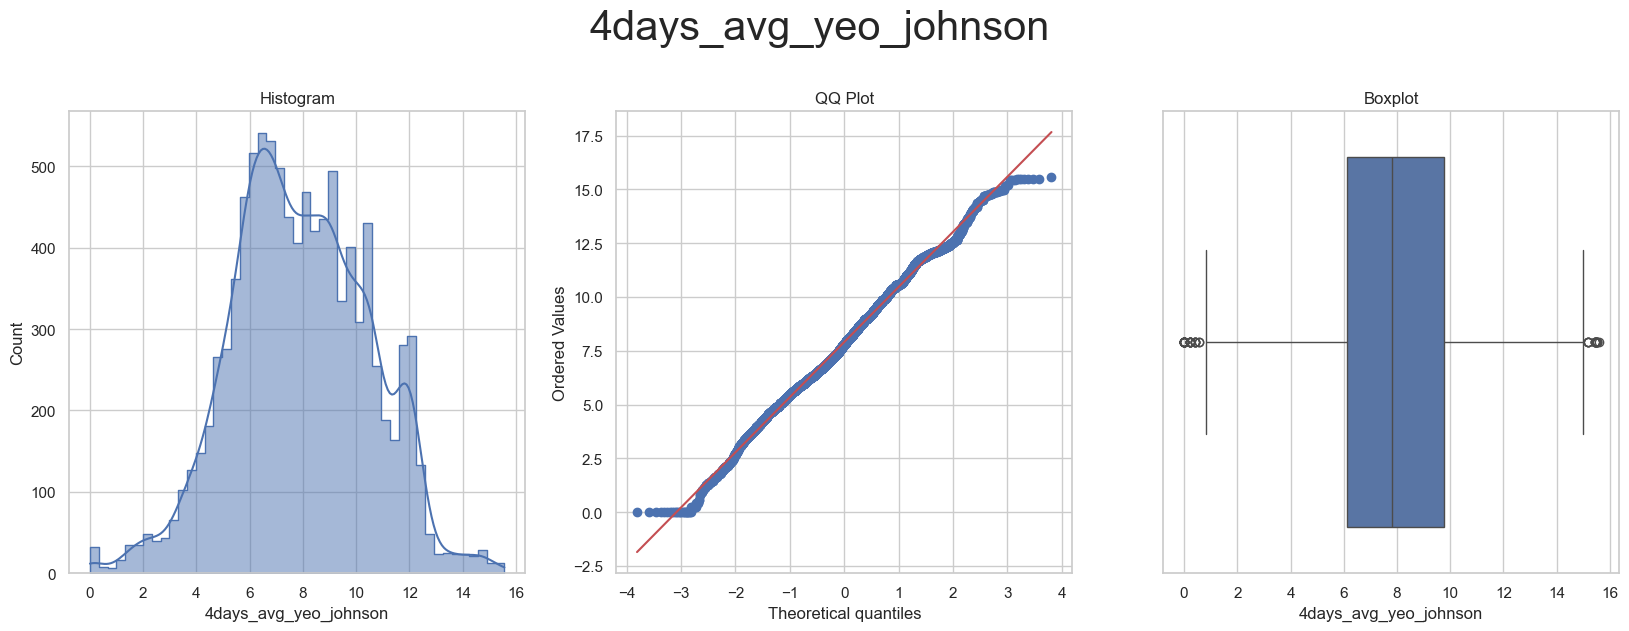



* Variable Analyzed: Difference
* Applied transformation: ['Difference_power', 'Difference_yeo_johnson'] 



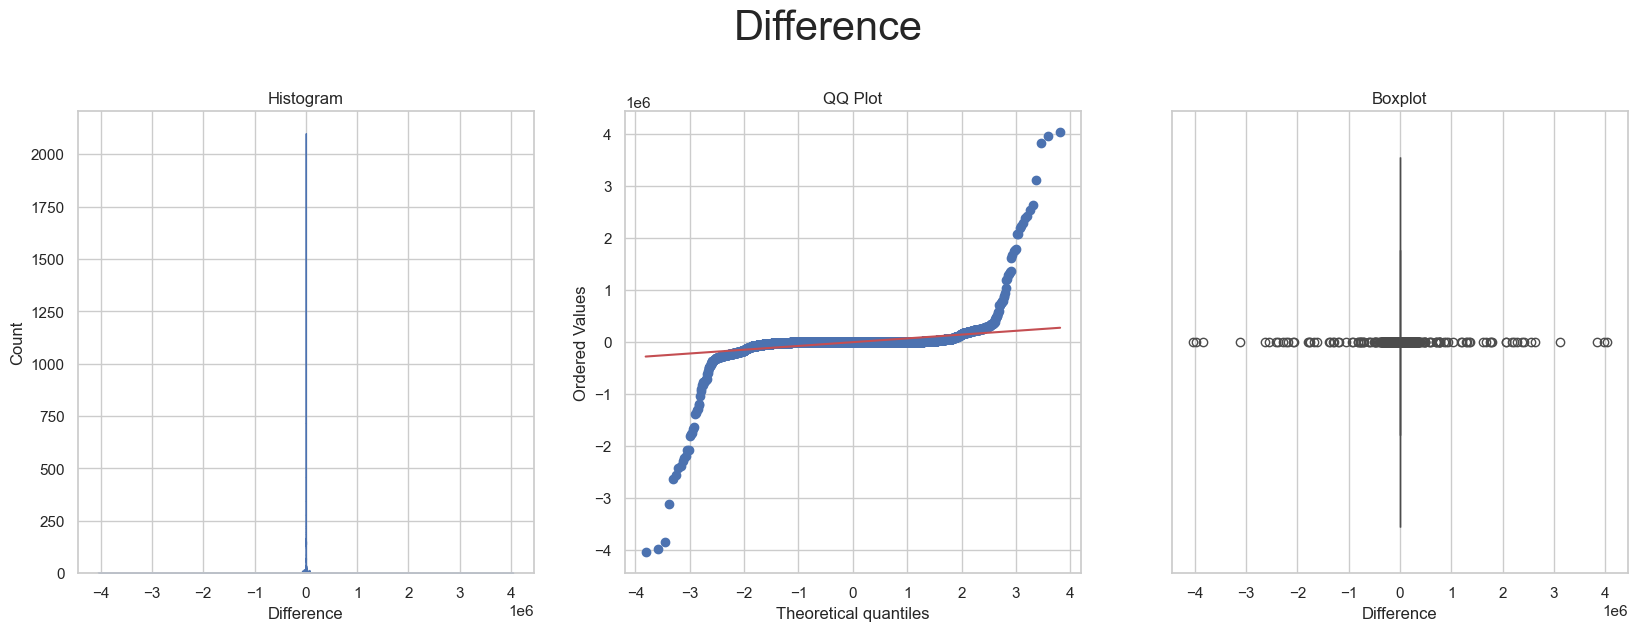

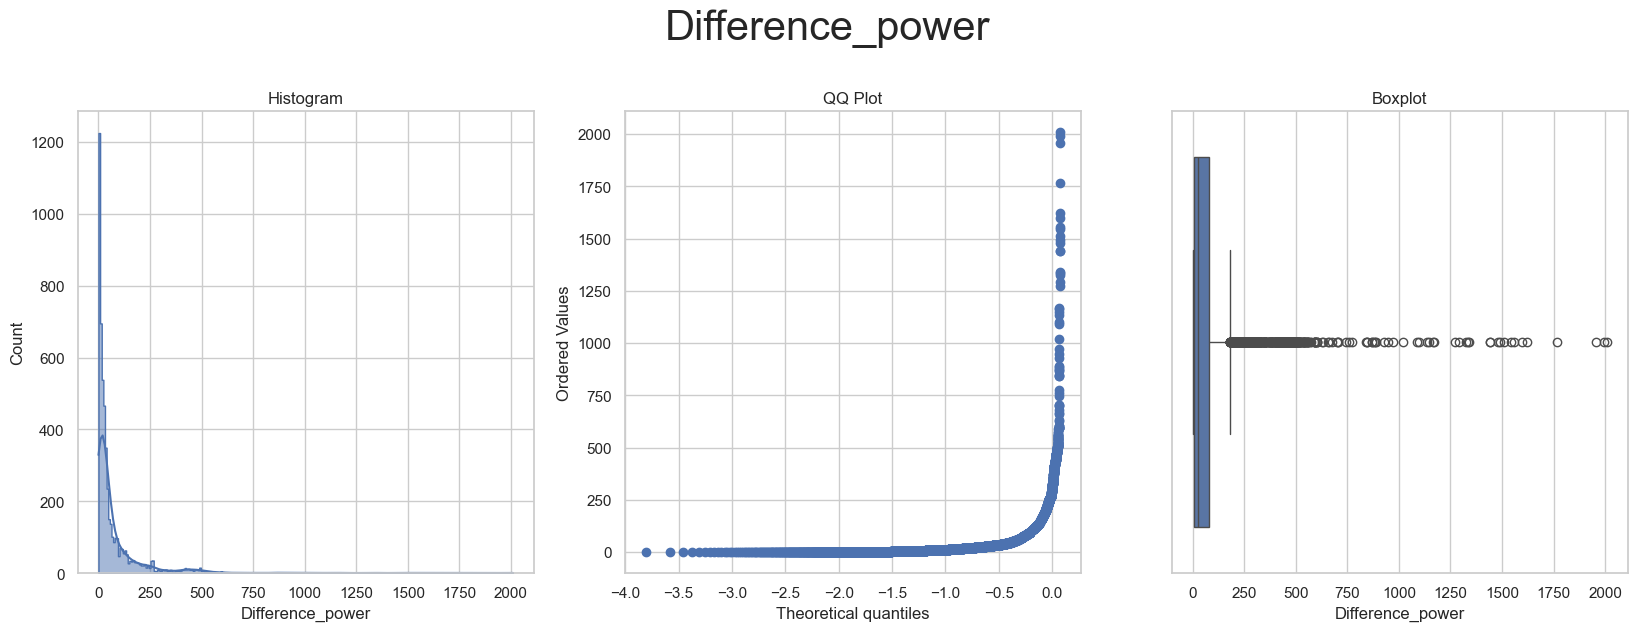

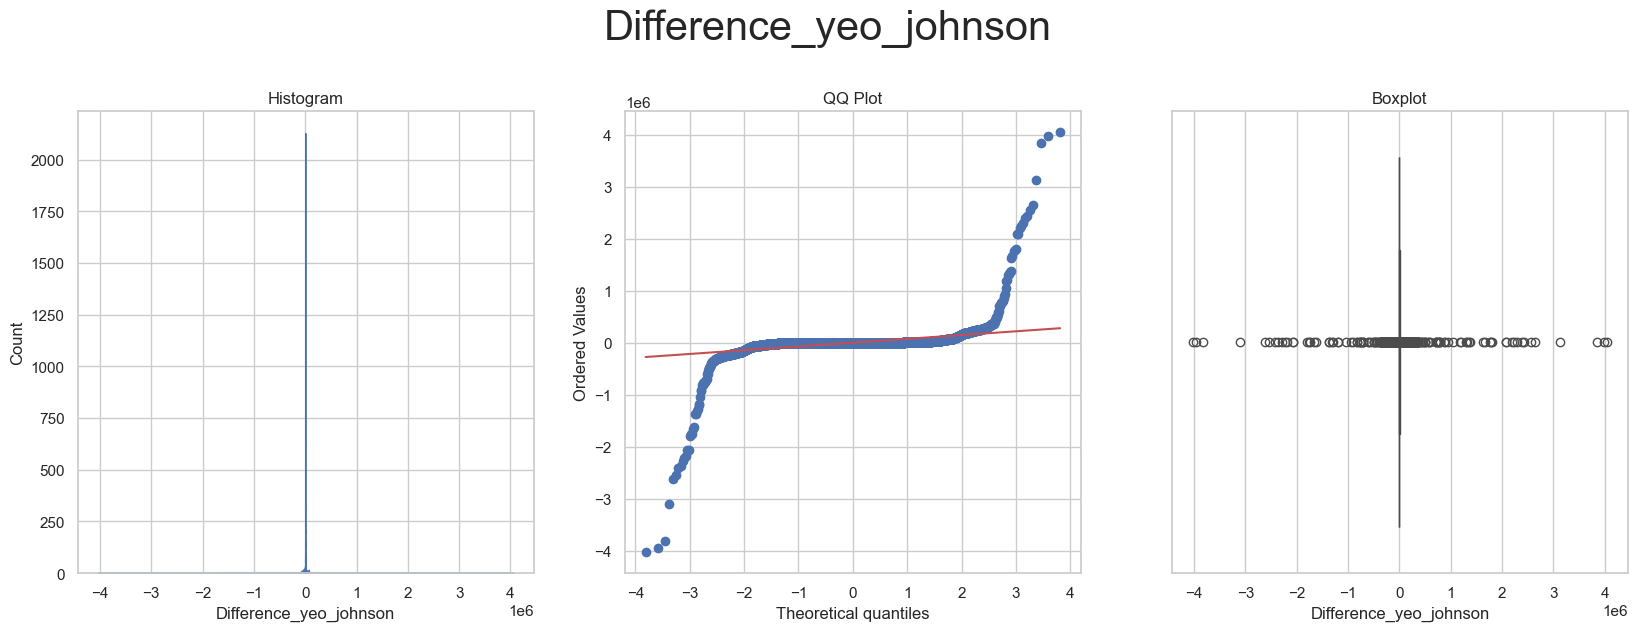

In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering,analysis_type='numerical')

Simple Histogram of Confirmed and Active cases

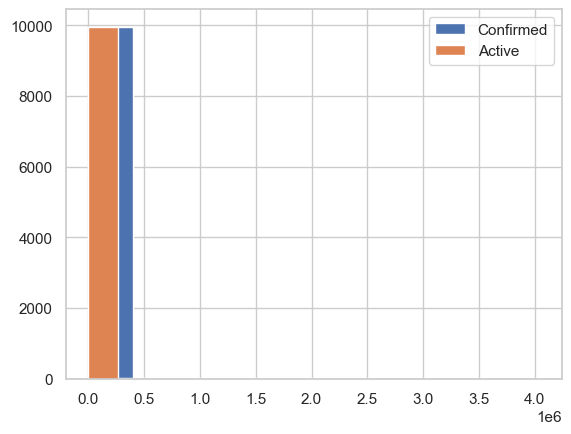

In [ ]:
for col in ['Confirmed', 'Active']:
    plt.hist(data=df,x=col,label=col)

plt.legend()
plt.show()



In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565


Writing a cleaned Data Frame into a file

In [ ]:
df.to_csv("..\\Dataset\\Cleaned\\covid_19_clean_processed.csv", index=False)

In [ ]:
df_transforming.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,15426.658623,-0.079908,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,15426.658623,-1240.000000,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,15426.658623,830.000000,565


Writing dataset to a file after feature engineering

In [ ]:
df_transforming.to_csv("..\\Dataset\\Cleaned\\covid_19_clean_transformed.csv", index=False)

#Starting Visualisation

In [ ]:
cc=df['Day'].value_counts()
cc

Day
Sunday       1486
Monday       1453
Friday       1451
Wednesday    1444
Saturday     1443
Thursday     1368
Tuesday      1355
Name: count, dtype: int64

Bar plot on day of the week basis

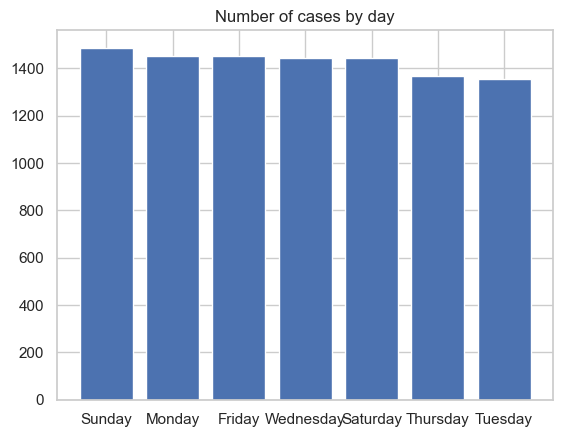

In [ ]:
plt.bar(x=cc.index, height=cc)
plt.title("Number of cases by day")
plt.show()

In [ ]:
cc=df['WHO Region'].value_counts()
cc

WHO Region
Europe                   3047
Western Pacific          2121
Africa                   1829
Americas                 1729
Eastern Mediterranean     901
South-East Asia           373
Name: count, dtype: int64

Creating a Bar plot on WHO Region

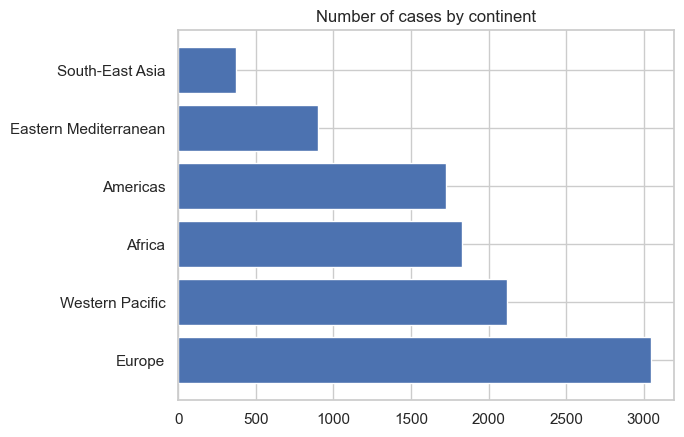

In [ ]:
plt.barh(y=cc.index,width=cc)
plt.title("Number of cases by continent")
plt.show()

Creating a pie chart on categorical column

In [ ]:
cc = df['WHO Region'].value_counts(normalize=True)
cc

WHO Region
Europe                   0.3047
Western Pacific          0.2121
Africa                   0.1829
Americas                 0.1729
Eastern Mediterranean    0.0901
South-East Asia          0.0373
Name: proportion, dtype: float64

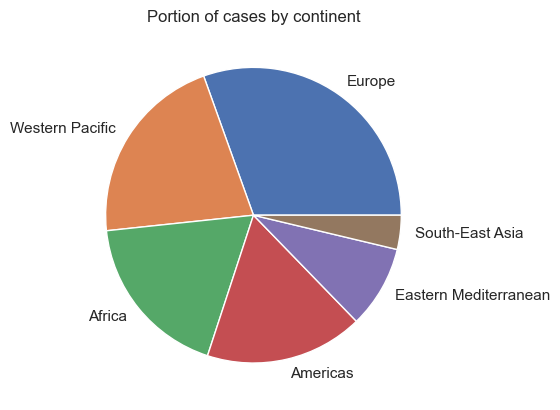

In [ ]:
plt.pie(x=cc, labels=cc.index)
plt.title("Portion of cases by continent")
plt.show()

In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565


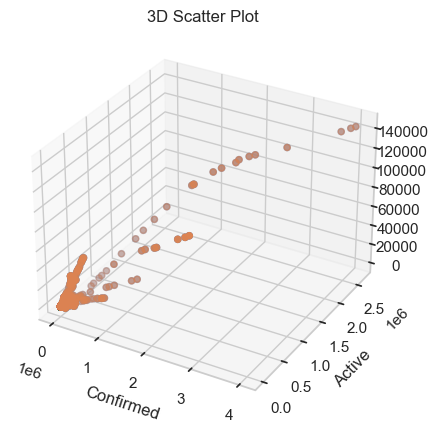

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

x = df['Confirmed']
y = df['Active']
z = df['no_of_deaths']

ax.scatter(x, y, z)
plt.xlabel('Confirmed')
plt.ylabel('Active')
plt.title('3D Scatter Plot')    
ax.scatter(x, y, z)
plt.show()

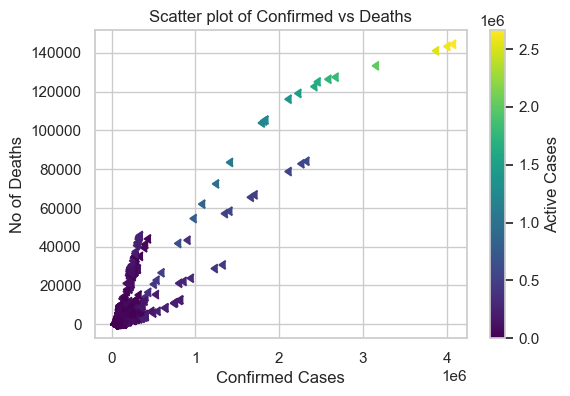

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=df, x='Confirmed',y='no_of_deaths', c='Active', cmap='viridis',marker=4)
plt.title('Scatter plot of Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('No of Deaths')
plt.colorbar(label='Active Cases')
plt.show()

In [ ]:
# fig, axes = plt.subplots(figsize=(8,4))
# axes.plot(df['Confirmed'], df['no_of_deaths'], color='m', linewidth=2 , linestyle=':', label='No of Deaths')
# axes.plot(df['Confirmed'], df['Confirmed'],color='#B35946', linestyle='-.', label='Confirmed')
# axes.legend(title='line plot', fontsize=10, loc='upper left')
# plt.show()

In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565


Scatter and Histograms

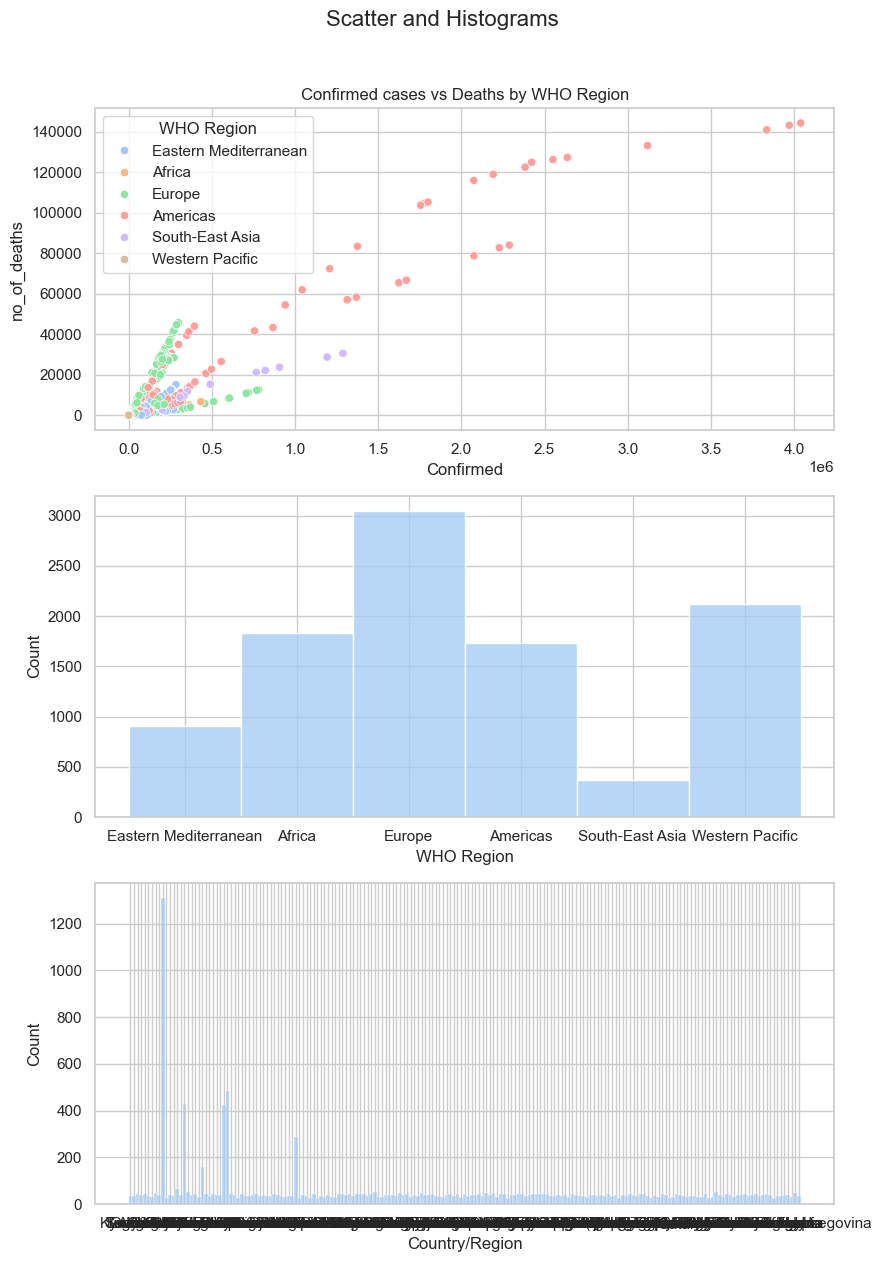

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(9, 12))

sns.scatterplot(data=df,
                x='Confirmed',
                y='no_of_deaths',
                hue="WHO Region",
                ax=axes[0]) # you use the Axes from Matplotlib line of code above

axes[0].set_title('Confirmed cases vs Deaths by WHO Region')
sns.histplot(data=df, x="WHO Region", ax=axes[1])
sns.histplot(data=df, x="Country/Region", ax=axes[2])

plt.tight_layout()
fig.suptitle('Scatter and Histograms', fontsize=16, y=1.05)
plt.show()

Scatter Plot between Confirmed vs Deaths by WHO Region

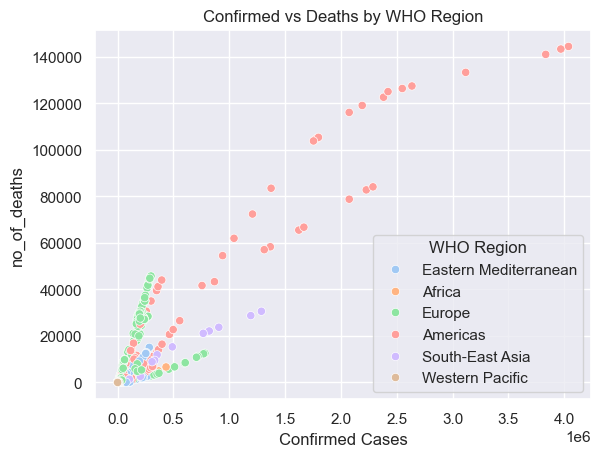

In [ ]:
sns.set_theme(palette='pastel')
sns.scatterplot(data=df, y='no_of_deaths',x='Confirmed', hue='WHO Region')
plt.xlabel('Confirmed Cases')
plt.title('Confirmed vs Deaths by WHO Region')
plt.show()

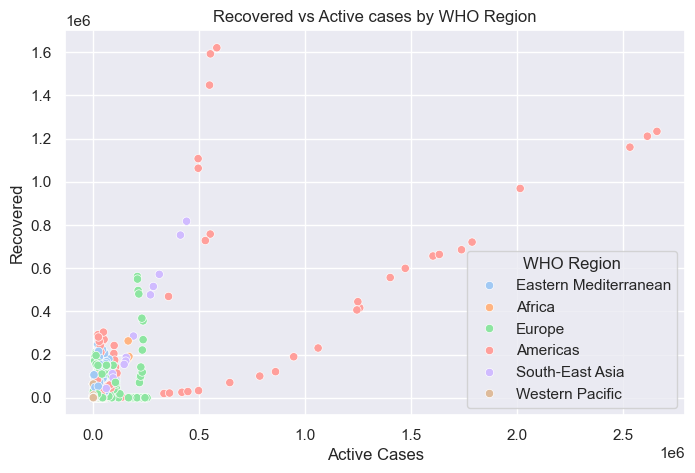

In [ ]:
sns.set_theme(palette='pastel')
fig = plt.figure(figsize=(8,5))
sns.scatterplot(data=df, y='Recovered',x='Active', hue='WHO Region')
plt.xlabel('Active Cases')
plt.title('Recovered vs Active cases by WHO Region')
plt.show()

In [ ]:
sns.set_style("whitegrid")

In [ ]:
sns.histplot(data=df[['no_of_deaths','Recovered']])
plt.show()

KeyboardInterrupt: 

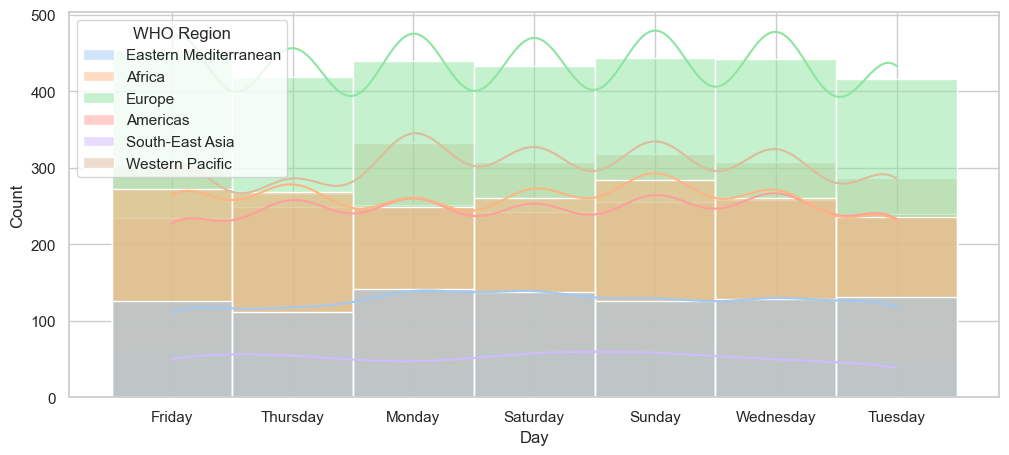

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.histplot(data=df, kde=True, x='Day', hue='WHO Region')
plt.show()



In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565


In [ ]:
# fig,ax = plt.subplots(figsize =(8,6))
# sns.kdeplot(data=df.filter(['Confirmed','no_of_deaths'], axis=1),fill=True)
# plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize =(8,6))
# sns.kdeplot(data=df.filter(['Recovered','Active'], axis=1),fill=True)
# plt.show()


Kde plots

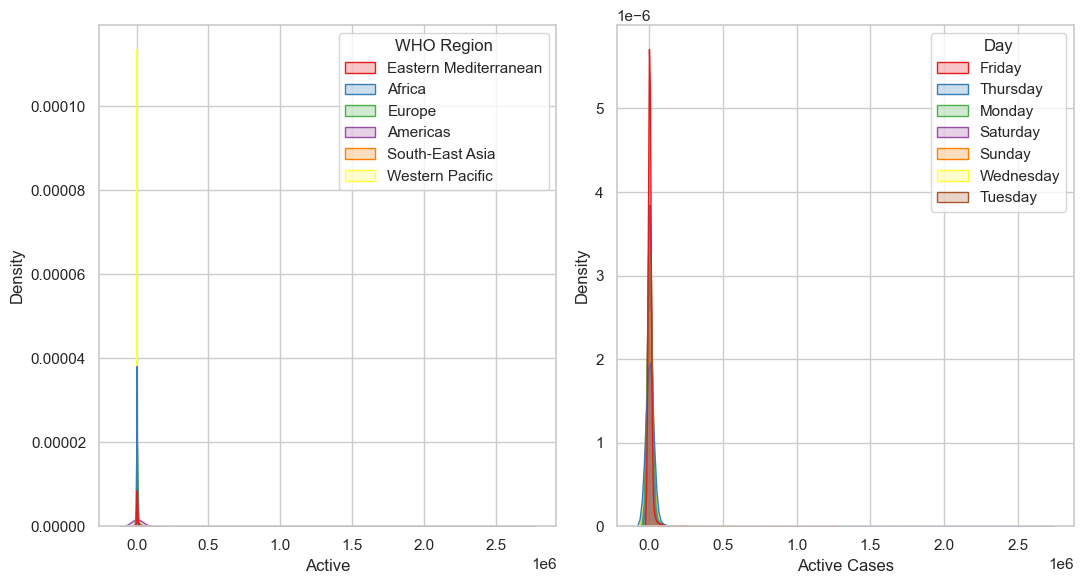

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(11,6))

sns.kdeplot(data=df, x='Active',hue='WHO Region',ax=axes[0],fill=True,  palette='Set1')
sns.kdeplot(data=df, x='Active',hue='Day',ax=axes[1],fill=True,  palette='Set1')
plt.xlabel('Active Cases')
plt.tight_layout()
plt.show()

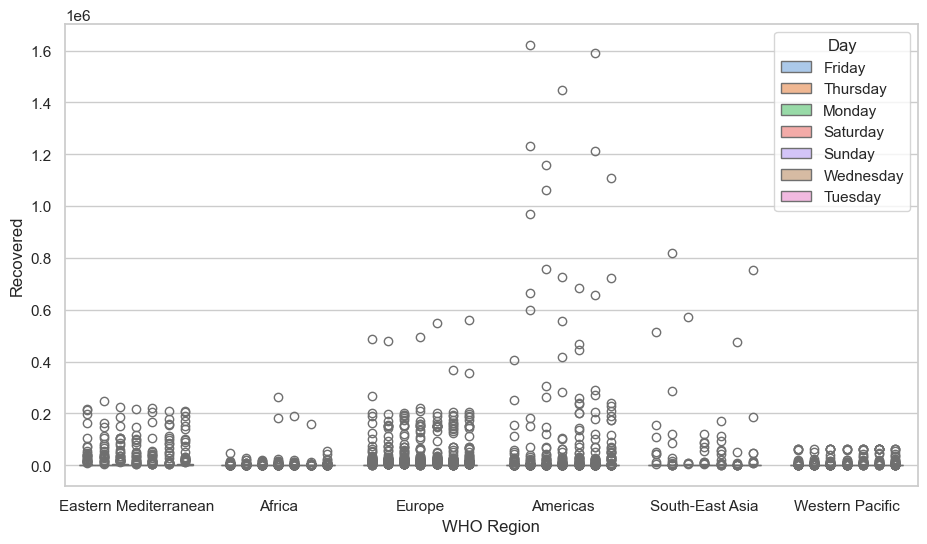

In [ ]:
fig = plt.figure(figsize =(11,6))
sns.boxplot(data=df, x='WHO Region', y='Recovered', hue='Day')
plt.show()

Jointplot with hexagons

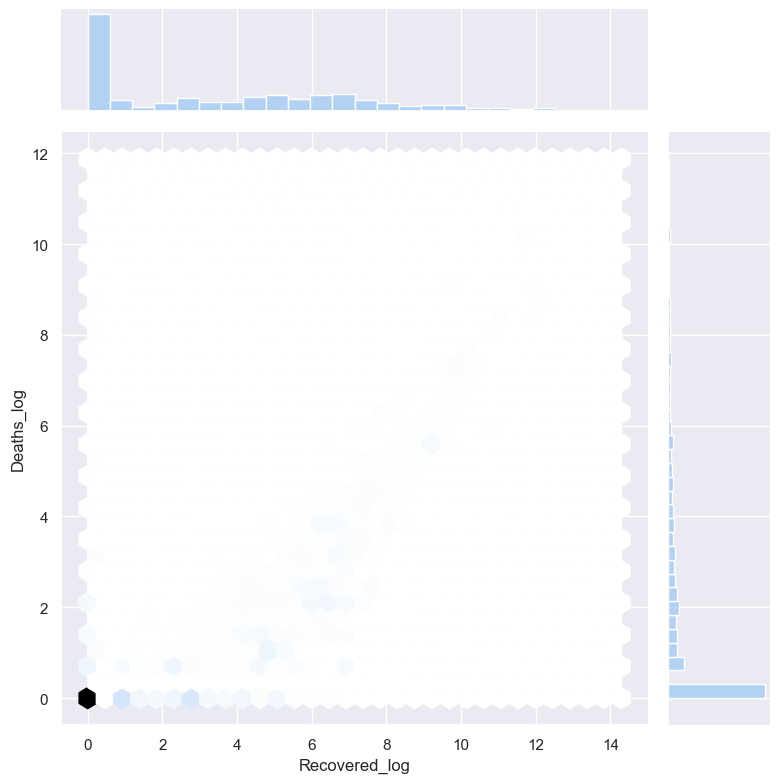

In [ ]:
import numpy as np
df['Recovered_log'] = np.log1p(df['Recovered'])
df['Deaths_log'] = np.log1p(df['no_of_deaths'])
sns.jointplot(data=df, y='Deaths_log', x='Recovered_log', kind='hex', height=8)
plt.show()

Joint plot with kdes and scatter

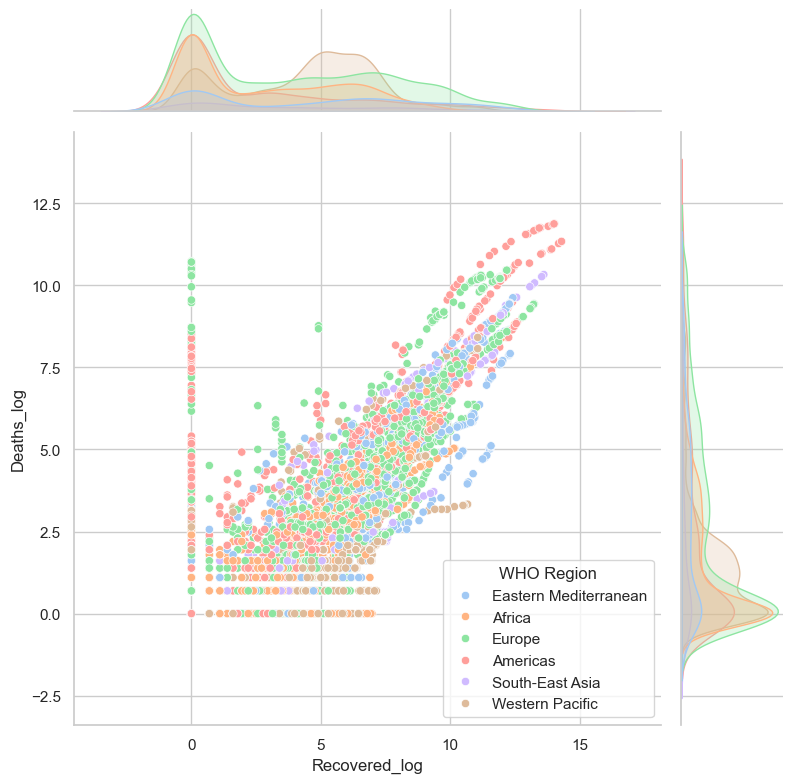

In [ ]:
df['Recovered_log'] = np.log1p(df['Recovered']) 
df['Deaths_log'] = np.log1p(df['no_of_deaths'])
sns.jointplot(data=df, y='Deaths_log', x='Recovered_log', hue='WHO Region', height=8)

lmplots

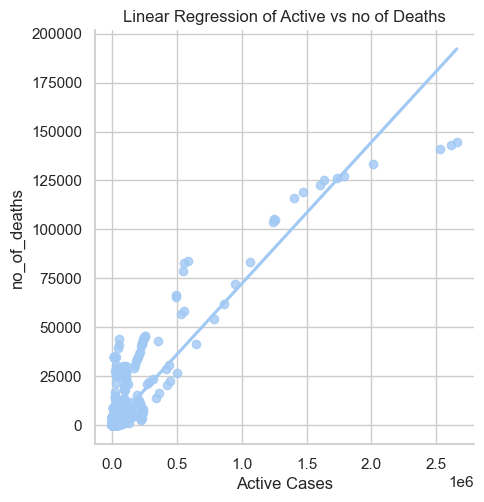

In [ ]:
sns.lmplot(data=df, x="Active", y="no_of_deaths", ci=None)
plt.title('Linear Regression of Active vs no of Deaths')
plt.xlabel('Active Cases')
plt.show()

Checking for Ploynomial Regression

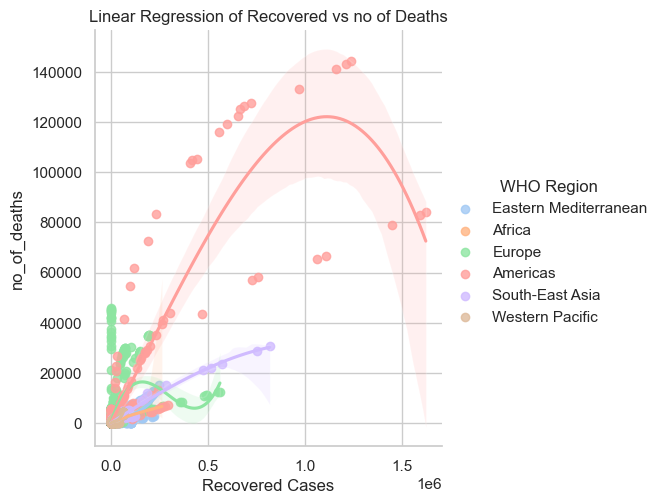

In [ ]:
sns.lmplot(data=df, x="Recovered", y="no_of_deaths", hue='WHO Region', order=3)
plt.title('Linear Regression of Recovered vs no of Deaths')
plt.xlabel('Recovered Cases')
plt.show()

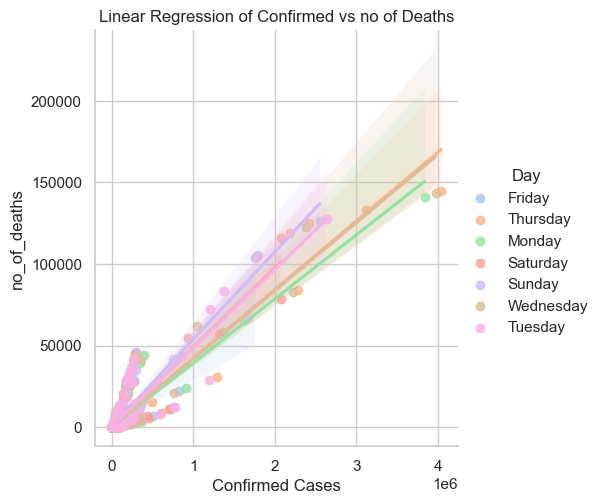

In [ ]:
sns.lmplot(data=df, x="Confirmed", y="no_of_deaths", hue='Day')
plt.title('Linear Regression of Confirmed vs no of Deaths')
plt.xlabel('Confirmed Cases')
plt.show()

Heatmaps

In [ ]:
df_corr = df.filter(['Confirmed','no_of_deaths','Recovered','Active']).corr(method='pearson')
df_corr

,Confirmed,no_of_deaths,Recovered,Active
Confirmed,1.000000,0.914826,0.895038,0.950556
no_of_deaths,0.914826,1.000000,0.767020,0.893393
Recovered,0.895038,0.767020,1.000000,0.712983
Active,0.950556,0.893393,0.712983,1.000000


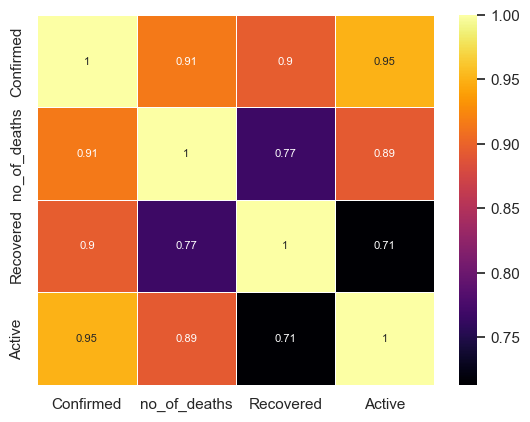

In [ ]:
sns.heatmap(data=df_corr, annot=True, linewidths=0.5, annot_kws={"size": 8},cmap='inferno')
plt.show()

In [ ]:
df_filter = df.filter(['Confirmed','no_of_deaths','Recovered','Active'])
df_filter.head(3)

,Confirmed,no_of_deaths,Recovered,Active
44580,1240,50,1067,123
16964,0,0,0,0
27026,830,10,575,245


In [ ]:
#df_filter = np.log1p(df_filter) 

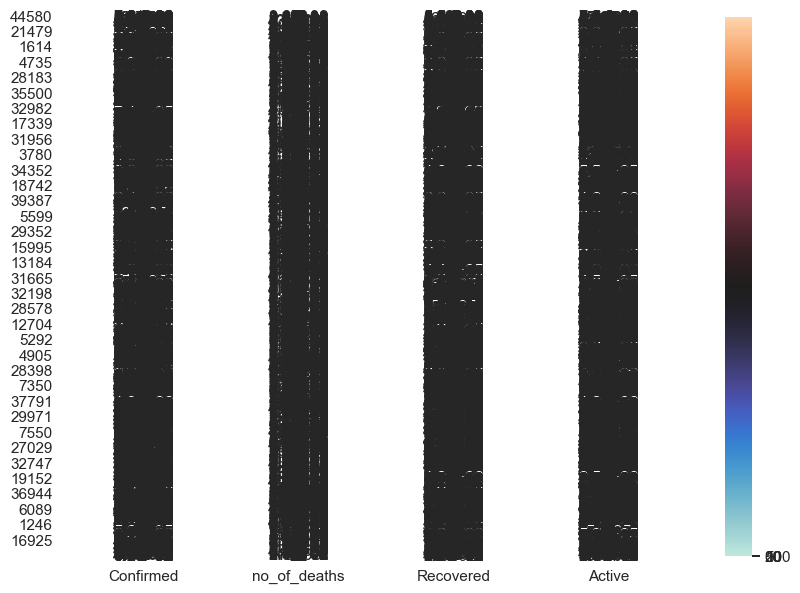

In [ ]:
fig, axes = plt.subplots(figsize=(10,7))
sns.heatmap(data=df_filter, annot=True, linewidths=.5, cmap='icefire', cbar_kws={'ticks': [0, 10, 20, 50, 100]})
plt.show()

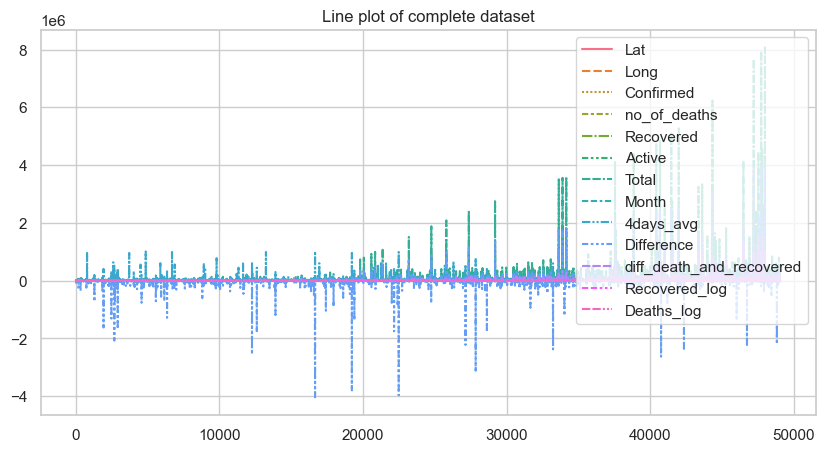

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
plt.title('Line plot of complete dataset')  
plt.show()

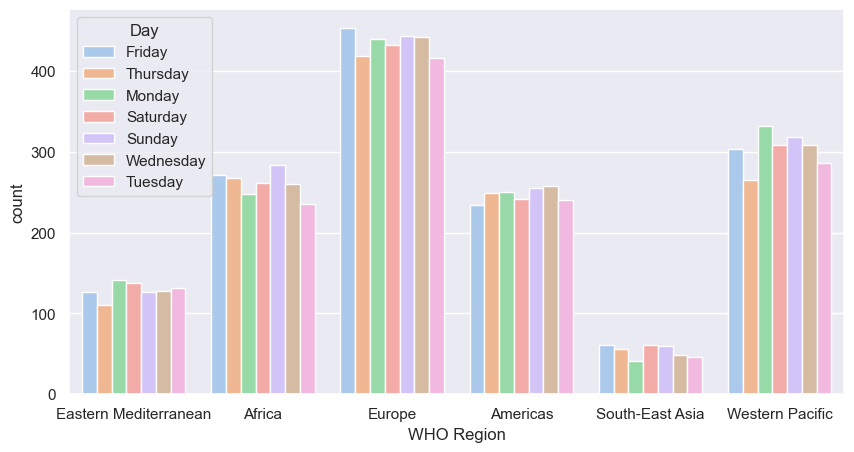

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.countplot(data=df, x='WHO Region', hue='Day')
plt.show()

Importing Plotly

In [ ]:
import plotly.express as px

In [9]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
fig =px.line(df, x='Date', y='Confirmed', color='WHO Region', title='Confirmed cases over time by WHO Region')
fig.show()

NameError: name 'px' is not defined

In [ ]:
fig = px.line(df, x="Date", y="Confirmed", color='WHO Region', facet_col='WHO Region',
              facet_col_wrap=2, title='Confirmed cases over time by WHO Region',
              hover_data=['Confirmed', 'no_of_deaths', 'Recovered', 'Active'])
fig.show()  

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,no_of_deaths,Recovered,Active,WHO Region,Total,Month,Day,4days_avg,Difference,diff_death_and_recovered,Recovered_log,Deaths_log
44580,Unknown,Tunisia,33.886917,9.537499,2020-07-10,1240,50,1067,123,Eastern Mediterranean,2480,7,Friday,NaN,NaN,1017,6.973543,3.931826
16964,Unknown,Lesotho,-29.610000,28.233600,2020-03-26,0,0,0,0,Africa,0,3,Thursday,NaN,-1240.0,0,0.000000,0.000000
27026,Unknown,Kyrgyzstan,41.204380,74.766098,2020-05-04,830,10,575,245,Europe,1660,5,Monday,NaN,830.0,565,6.356108,2.397895


In [ ]:
fig = px.area(df,x='Date',y='no_of_deaths', color='WHO Region', title='Deaths over time by WHO Region')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.histogram(df, x="Active", marginal="box")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.box(df, x="Day", y="Active")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.scatter(df, x="Confirmed", y="Active", 
                 animation_frame="Date", 
                 size="no_of_deaths",size_max=55, 
                 color="WHO Region", hover_name="Country/Region",
                 log_x=True, range_x=[100,100000], range_y=[100,100000]
            )

fig.show()

NameError: name 'px' is not defined

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
